In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
adult_data = pd.read_csv('adult.data',engine="python",sep=',\s',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hpw','native-county','income'])

In [5]:
adult_data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hpw  native-county income  
0          2174             0   40  United-States  <=50K  
1             0             0   13  United-States  <=50K  
2             0             0   40  United-States  <=50K  
3             0             0   40  United-States  <=50K  
4             0             0   40           Cuba  <=50K

In [6]:
adult_data.shape

(32561, 15)

In [7]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hpw             32561 non-null  int64 
 13  native-county   32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# percentage of missing workclass
adult_data[adult_data.workclass == '?'].shape[0]/adult_data.shape[0]

0.05638647461687295

In [9]:
# percentage of missing education
adult_data[adult_data['occupation'] == '?'].shape[0]/adult_data.shape[0]

0.056601455729246644

In [10]:
# percentage of missing education
adult_data[adult_data['native-county'] == '?'].shape[0]/adult_data.shape[0]

0.0179048555019809

In [11]:
# dropping rows with missing native country
adult_data.drop(adult_data[adult_data['native-county'] == '?'].index,inplace=True)

In [12]:
adult_data[(adult_data.workclass == 'Never-worked')]

age     workclass  fnlwgt     education  education-num  \
5361    18  Never-worked  206359          10th              6   
10845   23  Never-worked  188535       7th-8th              4   
14772   17  Never-worked  237272          10th              6   
20337   18  Never-worked  157131          11th              7   
23232   20  Never-worked  462294  Some-college             10   
32304   30  Never-worked  176673       HS-grad              9   
32314   18  Never-worked  153663  Some-college             10   

           marital-status occupation   relationship   race     sex  \
5361        Never-married          ?      Own-child  White    Male   
10845            Divorced          ?  Not-in-family  White    Male   
14772       Never-married          ?      Own-child  White    Male   
20337       Never-married          ?      Own-child  White  Female   
23232       Never-married          ?      Own-child  Black    Male   
32304  Married-civ-spouse          ?           Wife  Black  Female   
32314       Never-married          ?      Own-child  White    Male   

       capital-gain  capital-loss  hpw  native-county income  
5361              0             0   40  United-States  <=50K  
10845             0             0   35  United-States  <=50K  
14772             0             0   30  United-States  <=50K  
20337             0             0   10  United-States  <=50K  
23232             0             0   40  United-States  <=50K  
32304             0             0   40  United-States  <=50K  
32314             0             0    4  United-States  <=50K

Dropping all values where workclass and occupation is missing. Only 9 row remain with work class Never-worked. Setting occupatoin as "Unemployed" for those

In [13]:
adult_data.drop(adult_data[(adult_data['workclass'] == '?')].index,inplace=True)

In [14]:
adult_data['occupation'] = adult_data['occupation'].apply(lambda x: "Unemployed" if x == "?" else x)

### Some univariate and bivariate analysis

In [15]:
adult_data.age.describe()

count    30169.000000
mean        38.433757
std         13.136121
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

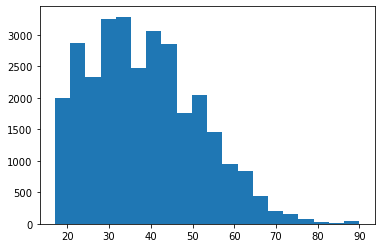

In [16]:
plt.hist(adult_data.age,bins=20)
plt.show()

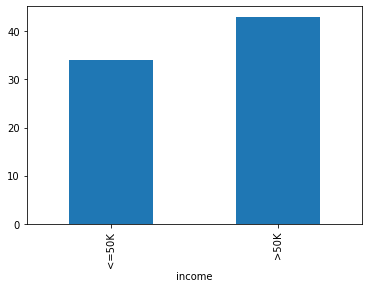

In [17]:
adult_data.groupby('income').age.median().plot.bar()
plt.show()

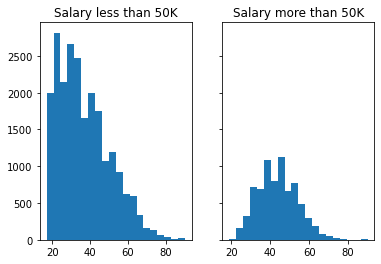

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.set_title("Salary less than 50K")
ax1.hist(adult_data[adult_data.income == '<=50K'].age,bins=20)

ax2.set_title("Salary more than 50K")
ax2.hist(adult_data[adult_data.income == '>50K'].age,bins=20)

plt.show()

Not normally distributed, early 20s, mid 30s and 40s seems to be the most common age group
People earning more than 50K seems to have higher age than people earning less than 50K

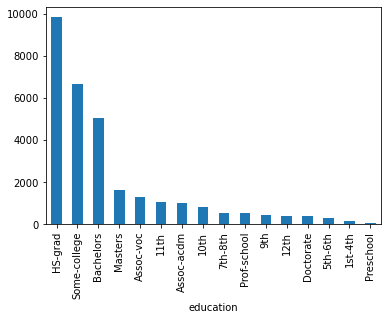

In [19]:
adult_data.groupby('education').age.count().sort_values(ascending=False).plot.bar()
plt.show()

High school graduate, college graduate and bachelor's degree graduate are the most common education qualifications

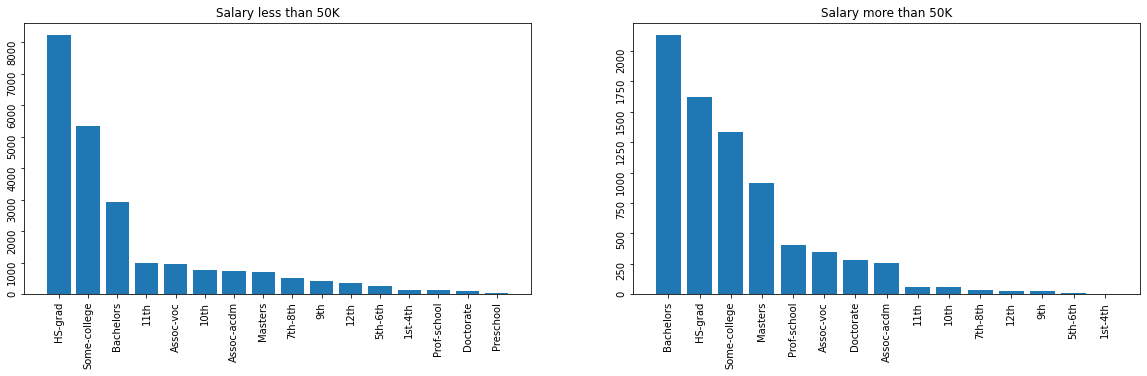

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(20,5))

ax1.set_title("Salary less than 50K")
data = adult_data[adult_data.income == '<=50K'].groupby('education').age.count().sort_values(ascending=False)
ax1.bar(data.index,data.values)
ax1.tick_params(labelrotation=90)

ax2.set_title("Salary more than 50K")
data = adult_data[adult_data.income == '>50K'].groupby('education').age.count().sort_values(ascending=False)
ax2.bar(data.index,data.values)
ax2.tick_params(labelrotation=90)

plt.show()

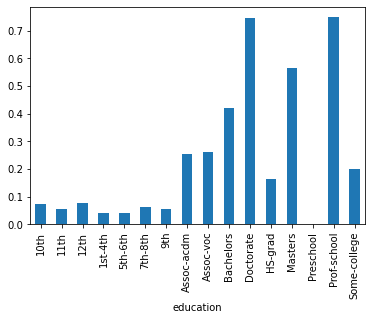

In [21]:
gt50_data = adult_data[adult_data.income == '>50K'].groupby('education').age.count()
education_agg = adult_data.groupby('education').age.count()
(gt50_data/education_agg).fillna(0).plot.bar()
plt.show()

Most people with bachelor's degree earn more than 50K while most high school grads earn less than 50K.
But people with Doctorates, Masters and proffessional school graduates have higher ratio of having salary more than 50K

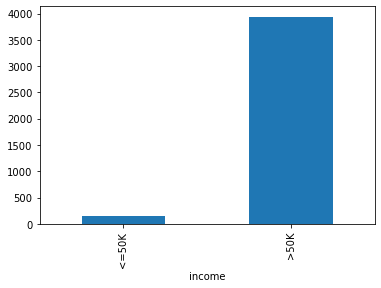

In [22]:
adult_data.groupby('income')['capital-gain'].mean().plot.bar()
plt.show()

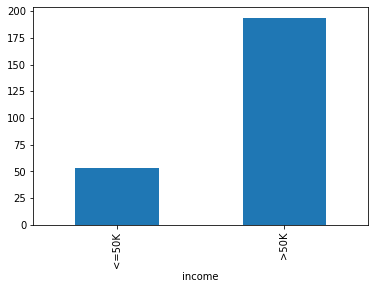

In [23]:
adult_data.groupby('income')['capital-loss'].mean().plot.bar()
plt.show()

People earning more than 50K seems to have more capital gain and loss

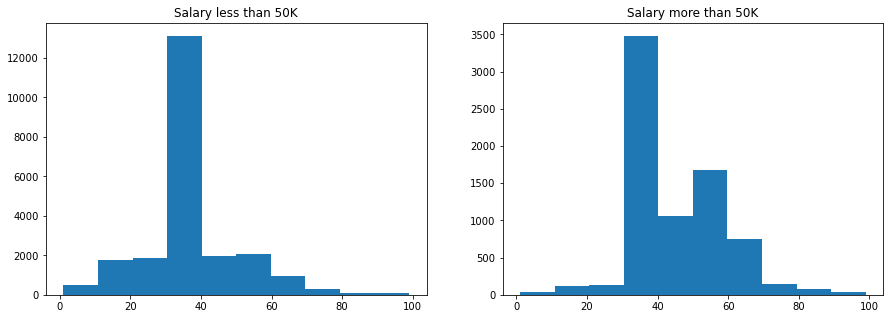

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.set_title("Salary less than 50K")
ax1.hist(adult_data[adult_data.income == '<=50K'].hpw,bins=10)

ax2.set_title("Salary more than 50K")
ax2.hist(adult_data[adult_data.income == '>50K'].hpw,bins=10)

plt.show()

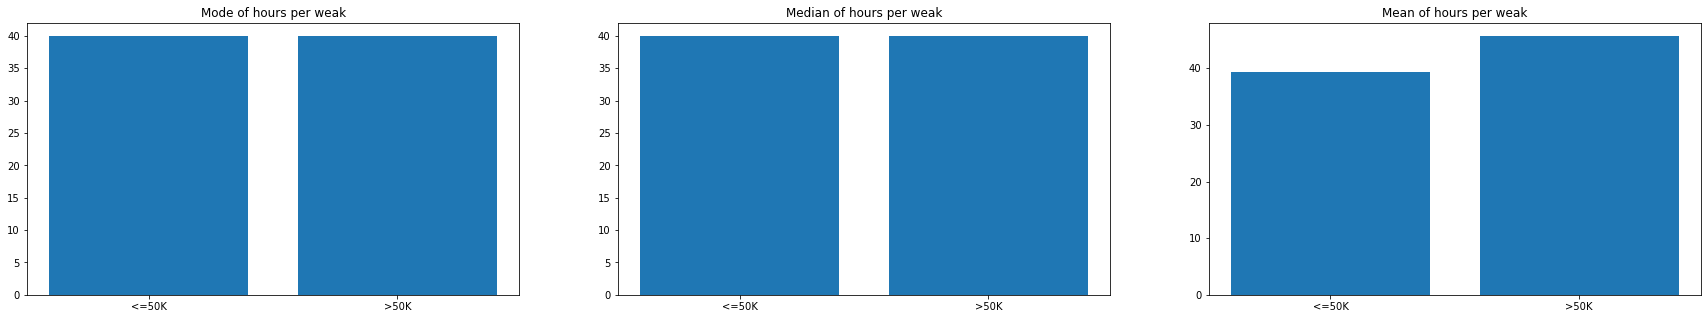

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(30,5))

data = adult_data.groupby('income')['hpw'].agg(pd.Series.mode)
ax1.bar(data.index, data.values)
ax1.set_title("Mode of hours per weak")

data = adult_data.groupby('income')['hpw'].agg(pd.Series.median)
ax2.bar(data.index, data.values)
ax2.set_title("Median of hours per weak")

data = adult_data.groupby('income')['hpw'].agg(pd.Series.mean)
ax3.bar(data.index, data.values)
ax3.set_title("Mean of hours per weak")

plt.show()

People earning more than 50K and less than 50K, all seems to be working almost 40 hrs per week but average is slightly higher for people earning more than 50K

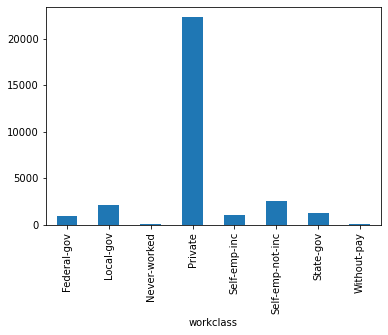

In [26]:
adult_data.groupby('workclass').age.count().plot.bar()
plt.show()

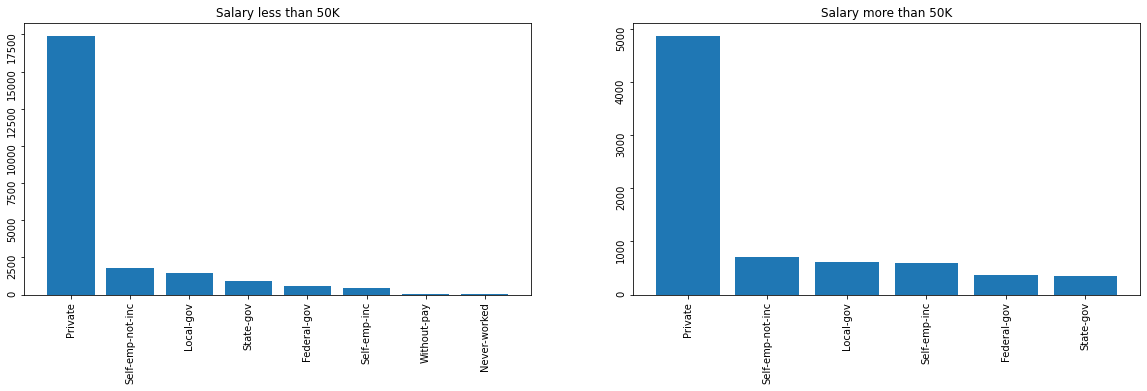

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(20,5))

ax1.set_title("Salary less than 50K")
data = adult_data[adult_data.income == '<=50K'].groupby('workclass').age.count().sort_values(ascending=False)
ax1.bar(data.index,data.values)
ax1.tick_params(labelrotation=90)

ax2.set_title("Salary more than 50K")
data = adult_data[adult_data.income == '>50K'].groupby('workclass').age.count().sort_values(ascending=False)
ax2.bar(data.index,data.values)
ax2.tick_params(labelrotation=90)

plt.show()

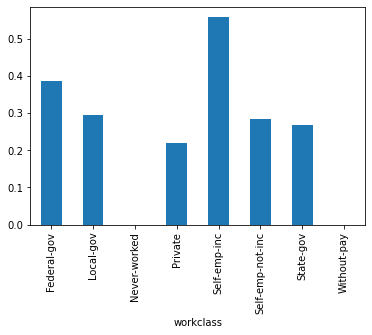

In [28]:
gt50_data = adult_data[adult_data.income == '>50K'].groupby('workclass').age.count()
workclass_agg = adult_data.groupby('workclass').age.count()
(gt50_data/workclass_agg).fillna(0).plot.bar()
plt.show()

Most people are working in private sector and hence constitutes as most common working class in less than 50K group as well as more than 50K group. But people that are either self employed in incorporated companies or working in federal govt have higher chance of earning more than 50K

Analysing income distribution based on race and gender

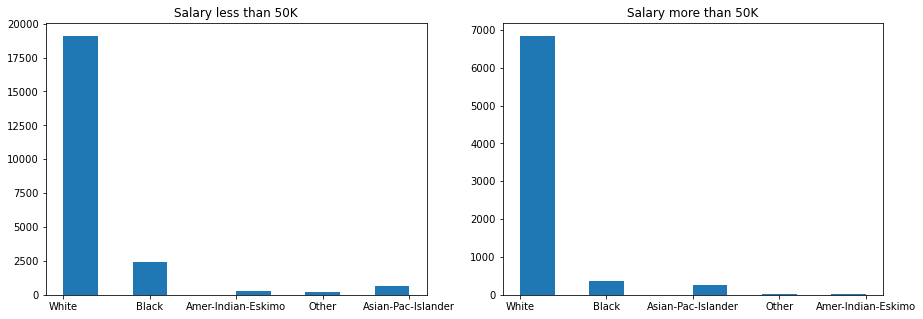

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.set_title("Salary less than 50K")
ax1.hist(adult_data[adult_data.income == '<=50K'].race,bins=10)

ax2.set_title("Salary more than 50K")
ax2.hist(adult_data[adult_data.income == '>50K'].race,bins=10)

plt.show()

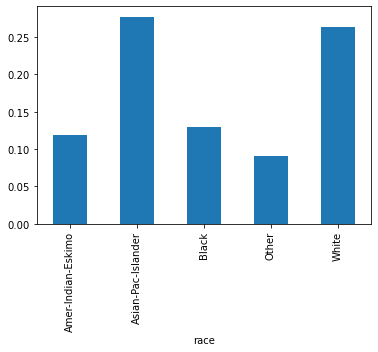

In [34]:
gt50_data = adult_data[adult_data.income == '>50K'].groupby('race').age.count()
race_agg = adult_data.groupby('race').age.count()
(gt50_data/race_agg).fillna(0).plot.bar()
plt.show()

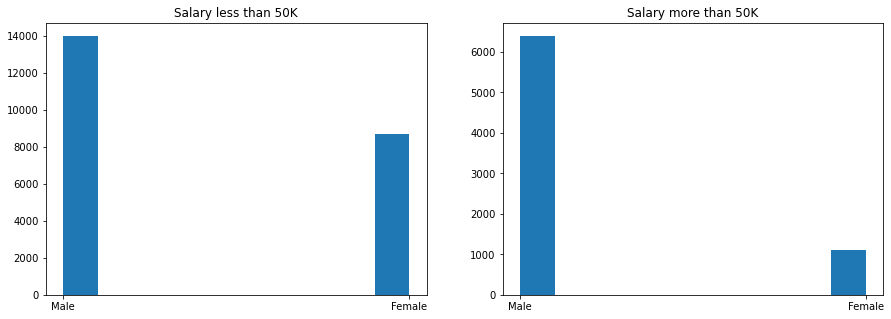

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.set_title("Salary less than 50K")
ax1.hist(adult_data[adult_data.income == '<=50K'].sex,bins=10)

ax2.set_title("Salary more than 50K")
ax2.hist(adult_data[adult_data.income == '>50K'].sex,bins=10)

plt.show()

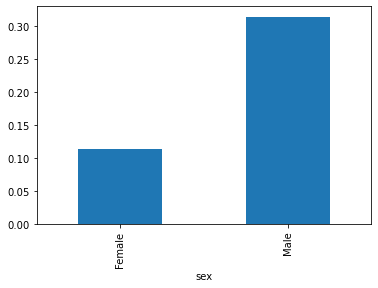

In [36]:
gt50_data = adult_data[adult_data.income == '>50K'].groupby('sex').age.count()
gender_agg = adult_data.groupby('sex').age.count()
(gt50_data/gender_agg).fillna(0).plot.bar()
plt.show()

Asian and White people have higher number of people earning more than $50k dollars per year as compared to other races. But asians constitute much smaller percentage of total dataset.

More males are present in our database and their is higher ratio of males earning more than 50 thousands dollar per year than females.

Dropping fnlwgt and education column. Information of education column is already captured in education_num column

In [29]:
adult_data = adult_data.drop(['fnlwgt','education'],axis=1)

Making dummies of categorical columns

In [30]:
encodCols = ['workclass','marital-status','occupation','relationship','race','sex','native-county','income']

In [31]:
colEnc = OneHotEncoder(drop='first',sparse=False)
encod_data = colEnc.fit_transform(adult_data[encodCols])

In [32]:
dummyCols = np.concatenate([np.delete(catList,colEnc.drop_idx_[idx]) for idx,catList in enumerate(colEnc.categories_)])

In [33]:
adult_data = pd.concat([adult_data.drop(encodCols,axis=1),pd.DataFrame(encod_data,columns=dummyCols,index=adult_data.index)],axis=1)

In [34]:
adult_data

age  education-num  capital-gain  capital-loss  hpw  Local-gov  \
0       39             13          2174             0   40        0.0   
1       50             13             0             0   13        0.0   
2       38              9             0             0   40        0.0   
3       53              7             0             0   40        0.0   
4       28             13             0             0   40        0.0   
...    ...            ...           ...           ...  ...        ...   
32556   27             12             0             0   38        0.0   
32557   40              9             0             0   40        0.0   
32558   58              9             0             0   40        0.0   
32559   22              9             0             0   20        0.0   
32560   52              9         15024             0   40        0.0   

       Never-worked  Private  Self-emp-inc  Self-emp-not-inc  State-gov  \
0               0.0      0.0           0.0               0.0        1.0   
1               0.0      0.0           0.0               1.0        0.0   
2               0.0      1.0           0.0               0.0        0.0   
3               0.0      1.0           0.0               0.0        0.0   
4               0.0      1.0           0.0               0.0        0.0   
...             ...      ...           ...               ...        ...   
32556           0.0      1.0           0.0               0.0        0.0   
32557           0.0      1.0           0.0               0.0        0.0   
32558           0.0      1.0           0.0               0.0        0.0   
32559           0.0      1.0           0.0               0.0        0.0   
32560           0.0      0.0           1.0               0.0        0.0   

       Without-pay  Married-AF-spouse  Married-civ-spouse  \
0              0.0                0.0                 0.0   
1              0.0                0.0                 1.0   
2              0.0                0.0                 0.0   
3              0.0                0.0                 1.0   
4              0.0                0.0                 1.0   
...            ...                ...                 ...   
32556          0.0                0.0                 1.0   
32557          0.0                0.0                 1.0   
32558          0.0                0.0                 0.0   
32559          0.0                0.0                 0.0   
32560          0.0                0.0                 1.0   

       Married-spouse-absent  Never-married  Separated  Widowed  Armed-Forces  \
0                        0.0            1.0        0.0      0.0           0.0   
1                        0.0            0.0        0.0      0.0           0.0   
2                        0.0            0.0        0.0      0.0           0.0   
3                        0.0            0.0        0.0      0.0           0.0   
4                        0.0            0.0        0.0      0.0           0.0   
...                      ...            ...        ...      ...           ...   
32556                    0.0            0.0        0.0      0.0           0.0   
32557                    0.0            0.0        0.0      0.0           0.0   
32558                    0.0            0.0        0.0      1.0           0.0   
32559                    0.0            1.0        0.0      0.0           0.0   
32560                    0.0            0.0        0.0      0.0           0.0   

       Craft-repair  Exec-managerial  Farming-fishing  Handlers-cleaners  \
0               0.0              0.0              0.0                0.0   
1               0.0              1.0              0.0                0.0   
2               0.0              0.0              0.0                1.0   
3               0.0              0.0              0.0                1.0   
4               0.0              0.0              0.0                0.0   
...             ...              ...              ...              

In [35]:
adult_data = adult_data.rename(columns={'>50K':'GT50'})

In [36]:
adult_test = pd.read_csv('adult.test',engine="python",sep=',\s',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hpw','native-county','income'])

In [37]:
adult_test.drop(adult_test[adult_test['native-county'] == '?'].index,inplace=True)

In [38]:
adult_test.drop(adult_test[adult_test['workclass'] == '?'].index,inplace=True)

In [39]:
adult_test['occupation'] = adult_test['occupation'].apply(lambda x: "Unemployed" if x == "?" else x)

In [40]:
#fixing income column values. removing . from end
adult_test['income'] = adult_test['income'].apply(lambda x: x.replace('.',''))

In [41]:
test_encod_data = colEnc.transform(adult_test[encodCols])

In [42]:
adult_test = pd.concat([adult_test.drop(encodCols,axis=1),pd.DataFrame(test_encod_data,columns=dummyCols,index=adult_test.index)],axis=1)

In [43]:
adult_test = adult_test.drop(['fnlwgt','education'],axis=1)

adult_test = adult_test.rename(columns={'>50K':'GT50'})

In [44]:
adult_test

age  education-num  capital-gain  capital-loss  hpw  Local-gov  \
0       25              7             0             0   40        0.0   
1       38              9             0             0   50        0.0   
2       28             12             0             0   40        1.0   
3       44             10          7688             0   40        0.0   
5       34              6             0             0   30        0.0   
...    ...            ...           ...           ...  ...        ...   
16275   33             13             0             0   40        0.0   
16276   39             13             0             0   36        0.0   
16278   38             13             0             0   50        0.0   
16279   44             13          5455             0   40        0.0   
16280   35             13             0             0   60        0.0   

       Never-worked  Private  Self-emp-inc  Self-emp-not-inc  State-gov  \
0               0.0      1.0           0.0               0.0        0.0   
1               0.0      1.0           0.0               0.0        0.0   
2               0.0      0.0           0.0               0.0        0.0   
3               0.0      1.0           0.0               0.0        0.0   
5               0.0      1.0           0.0               0.0        0.0   
...             ...      ...           ...               ...        ...   
16275           0.0      1.0           0.0               0.0        0.0   
16276           0.0      1.0           0.0               0.0        0.0   
16278           0.0      1.0           0.0               0.0        0.0   
16279           0.0      1.0           0.0               0.0        0.0   
16280           0.0      0.0           1.0               0.0        0.0   

       Without-pay  Married-AF-spouse  Married-civ-spouse  \
0              0.0                0.0                 0.0   
1              0.0                0.0                 1.0   
2              0.0                0.0                 1.0   
3              0.0                0.0                 1.0   
5              0.0                0.0                 0.0   
...            ...                ...                 ...   
16275          0.0                0.0                 0.0   
16276          0.0                0.0                 0.0   
16278          0.0                0.0                 1.0   
16279          0.0                0.0                 0.0   
16280          0.0                0.0                 1.0   

       Married-spouse-absent  Never-married  Separated  Widowed  Armed-Forces  \
0                        0.0            1.0        0.0      0.0           0.0   
1                        0.0            0.0        0.0      0.0           0.0   
2                        0.0            0.0        0.0      0.0           0.0   
3                        0.0            0.0        0.0      0.0           0.0   
5                        0.0            1.0        0.0      0.0           0.0   
...                      ...            ...        ...      ...           ...   
16275                    0.0            1.0        0.0      0.0           0.0   
16276                    0.0            0.0        0.0      0.0           0.0   
16278                    0.0            0.0        0.0      0.0           0.0   
16279                    0.0            0.0        0.0      0.0           0.0   
16280                    0.0            0.0        0.0      0.0           0.0   

       Craft-repair  Exec-managerial  Farming-fishing  Handlers-cleaners  \
0               0.0              0.0              0.0                0.0   
1               0.0              0.0              1.0                0.0   
2               0.0              0.0              0.0                0.0   
3               0.0              0.0              0.0                0.0   
5               0.0              0.0              0.0                0.0   
...             ...              ...              ...              

<AxesSubplot:>

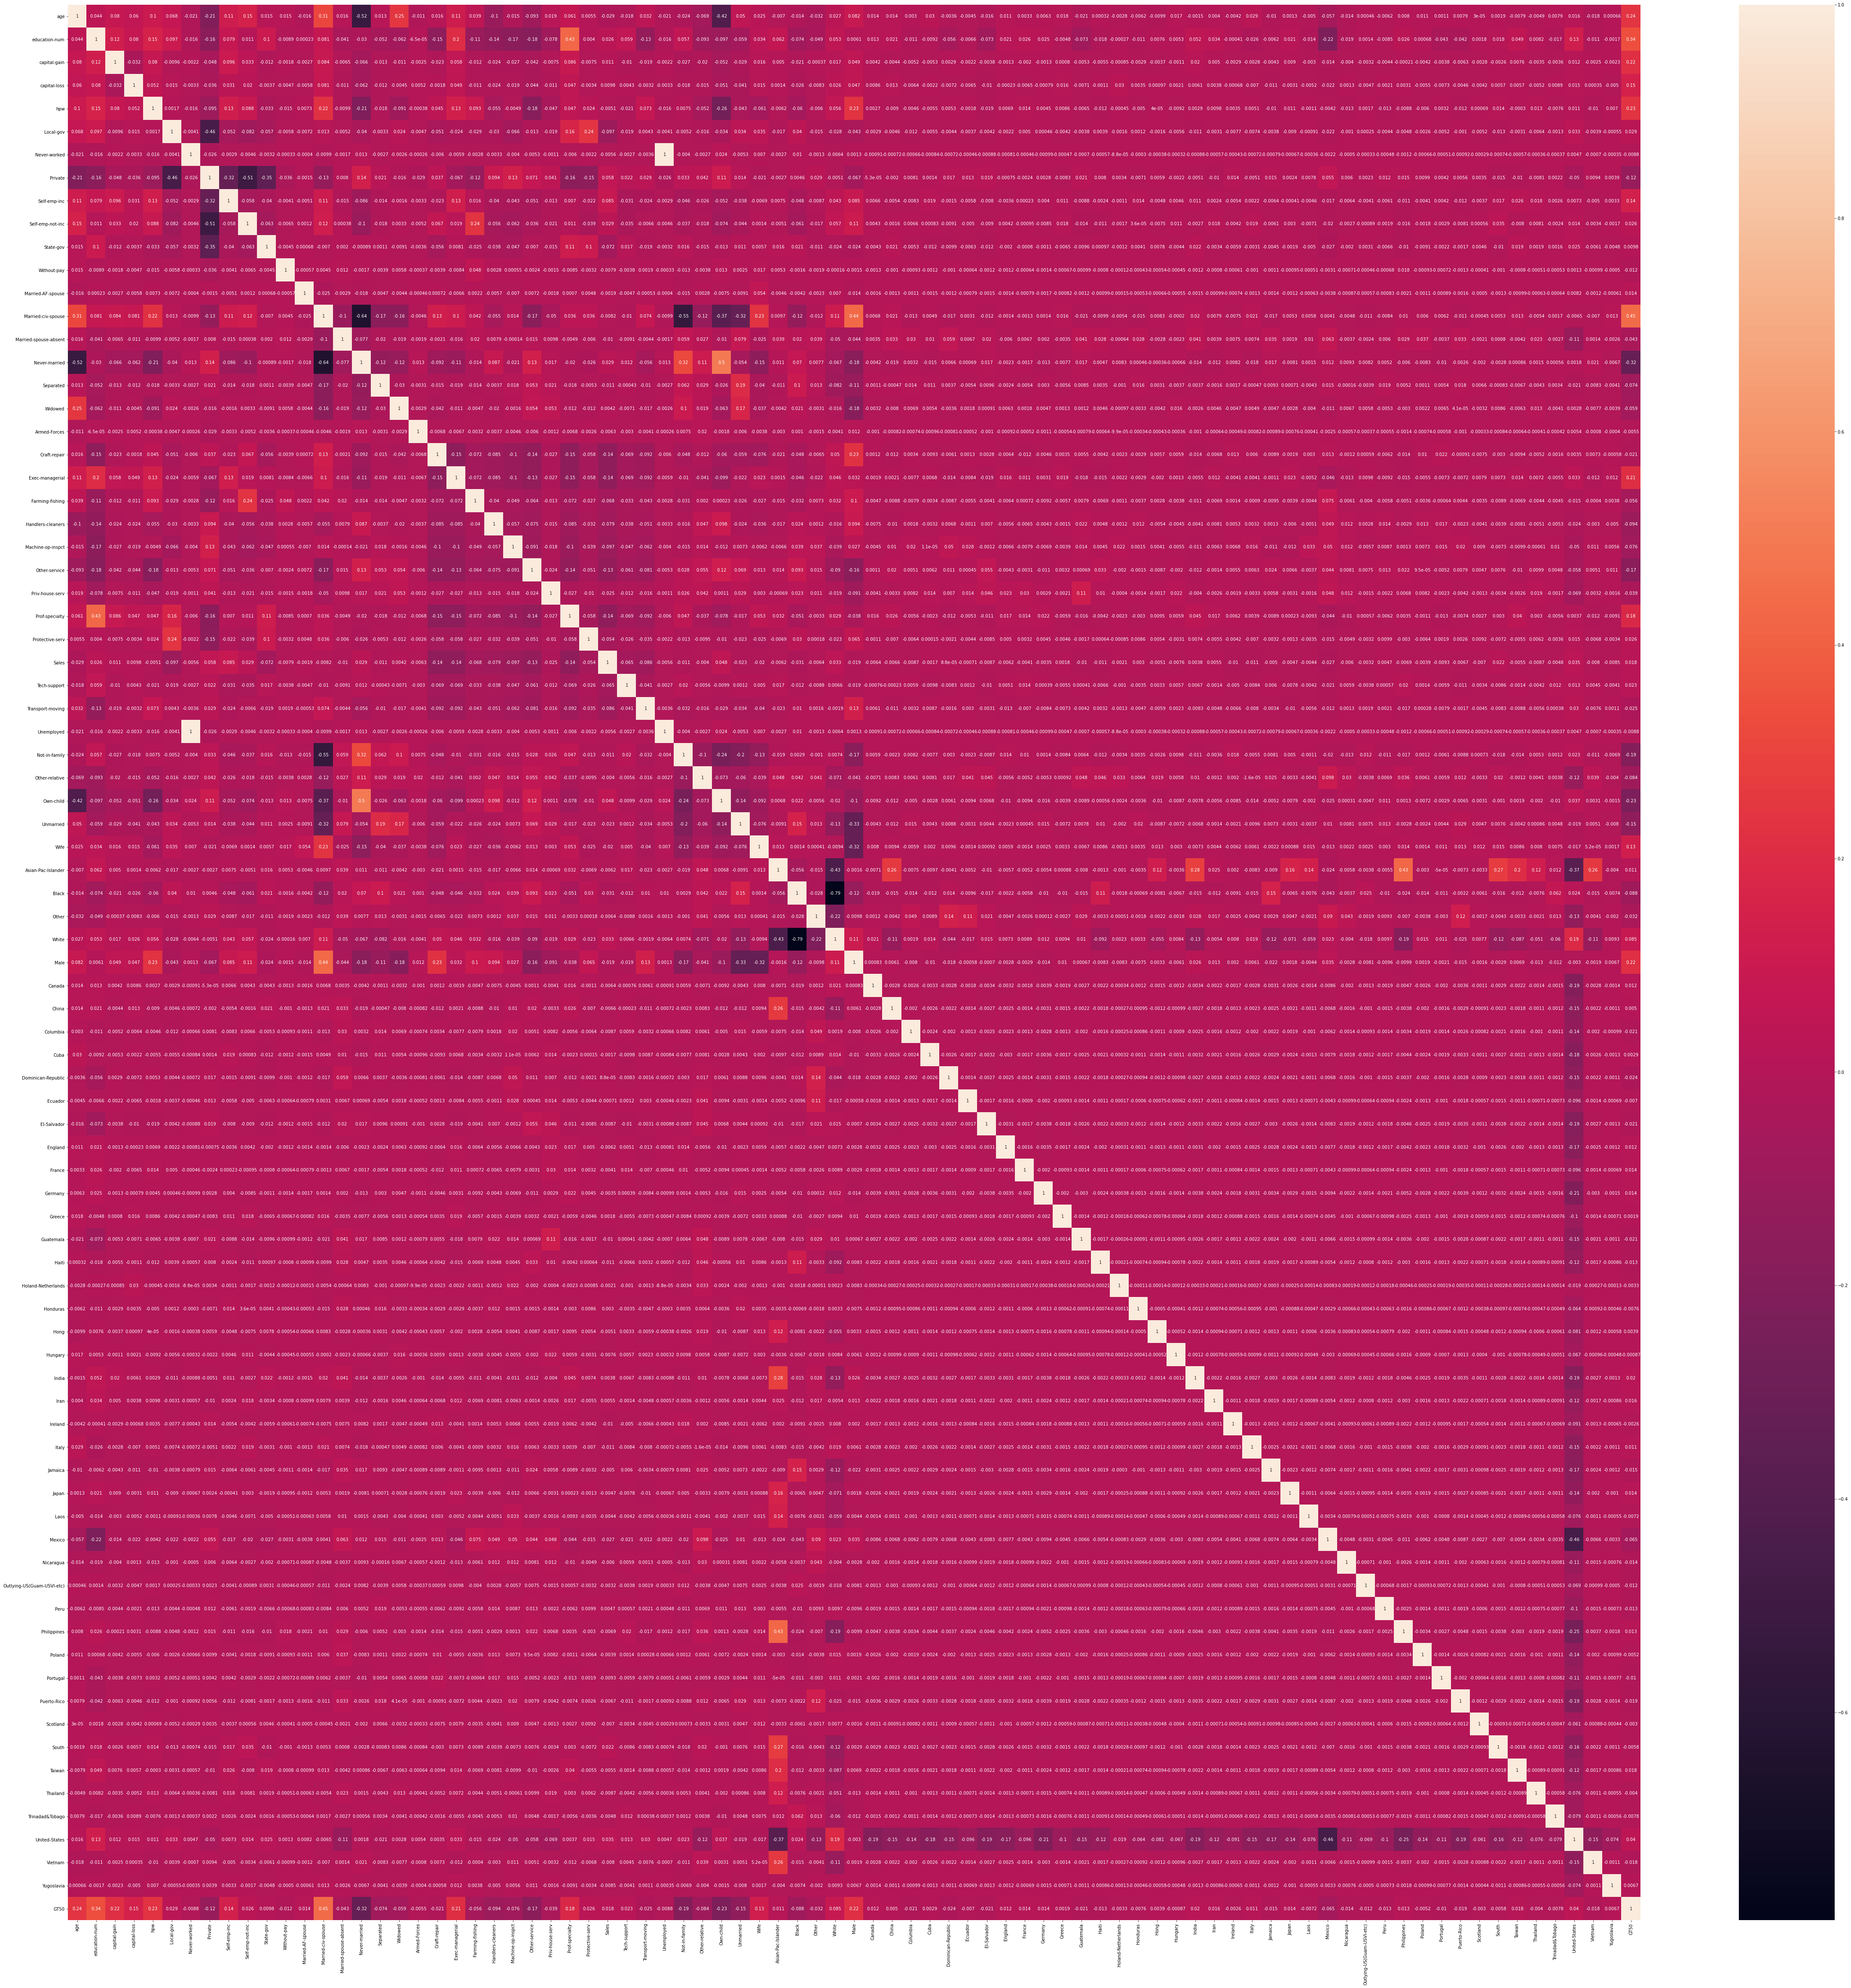

In [31]:
plt.figure(figsize=(82,82))
sns.heatmap(adult_data.corr(),annot=True)

Education, age Married and living with spouse features are good indicator of income >= 50k

In [45]:
y_train = adult_data.pop('GT50')
X_train = adult_data.copy()

In [46]:
y_test = adult_test.pop("GT50")
X_test = adult_test.copy()

In [47]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [48]:
scalable_vars = ['age','capital-loss','capital-gain','hpw','education-num']
scaler = MinMaxScaler()
X_train[scalable_vars]=scaler.fit_transform(X_train[scalable_vars])

In [49]:
X_test[scalable_vars] = scaler.transform(X_test[scalable_vars])

In [50]:
X_train_lm =  sm.add_constant(X_train)
glm = sm.GLM(y_train,X_train_lm).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   GT50   No. Observations:                30169
Model:                            GLM   Df Residuals:                    30087
Model Family:                Gaussian   Df Model:                           81
Link Function:               identity   Scale:                         0.11909
Method:                          IRLS   Log-Likelihood:                -10666.
Date:                Mon, 09 Nov 2020   Deviance:                       3582.4
Time:                        21:17:19   Pearson chi2:                 3.58e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1260      0.092     -1.376      0.169      -0.305       0.053
age                            0.2233      0.014     15.817      0.000       0.196       0.251
education-num                  0.4878      0.015     32.479      0.000       0.458       0.517
capital-gain                   0.8076      0.027     29.499      0.000       0.754       0.861
capital-loss                   0.4129      0.022     19.079      0.000       0.371       0.455
hpw                            0.2802      0.018     15.581      0.000       0.245       0.315
Local-gov                     -0.0976      0.014     -7.043      0.000      -0.125      -0.070
Never-worked                  -0.0177      0.066     -0.270      0.787      -0.146       0.111
Private                       -0.0681      0.012     -5.787      0.000      -0.091      -0.045
Self-emp-inc                  -0.0113      0.016     -0.714      0.475      -0.042       0.020
Self-emp-not-inc              -0.1346      0.014     -9.859      0.000      -0.161      -0.108
State-gov                     -0.1076      0.015     -7.186      0.000      -0.137      -0.078
Without-pay                   -0.2457      0.093     -2.637      0.008      -0.428      -0.063
Married-AF-spouse              0.2096      0.079      2.653      0.008       0.055       0.364
Married-civ-spouse             0.1198      0.025      4.735      0.000       0.070       0.169
Married-spouse-absent          0.0386      0.019      2.036      0.042       0.001       0.076
Never-married                 -0.0025      0.007     -0.338      0.735      -0.017       0.012
Separated                      0.0158      0.013      1.260      0.208      -0.009       0.040
Widowed                        0.0172      0.014      1.268      0.205      -0.009       0.044
Armed-Forces                  -0.1211      0.116     -1.046      0.295      -0.348       0.106
Craft-repair                  -0.0220      0.009     -2.562      0.010      -0.039      -0.005
Exec-managerial                0.1388      0.008     16.679      0.000       0.122       0.155
Farming-fishing               -0.1034      0.013     -7.789      0.000      -0.129      -0.077
Handlers-cleaners             -0.0513      0.012     -4.447      0.000      -0.074      -0.029
Machine-op-inspct             -0.0458      0.010     -4.536      0.000      -0.066      -0.026
Other-service                 -0.0167      0.009     -1.955      0.051      -0.033    3.86e-05
Priv-house-serv                0.0347      0.030      1.159      0.246      -0.024       0.093
Prof-specialty                 0.1003      0.009     11.779      0.000       0.084       0.117
Protective-serv                0.0681      0.015      4.406      0.000       0.038       0.098
Sales                          0.0450      

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [52]:
X_train

age  education-num  capital-gain  capital-loss       hpw  \
0      0.301370       0.800000      0.021740           0.0  0.397959   
1      0.452055       0.800000      0.000000           0.0  0.122449   
2      0.287671       0.533333      0.000000           0.0  0.397959   
3      0.493151       0.400000      0.000000           0.0  0.397959   
4      0.150685       0.800000      0.000000           0.0  0.397959   
...         ...            ...           ...           ...       ...   
32556  0.136986       0.733333      0.000000           0.0  0.377551   
32557  0.315068       0.533333      0.000000           0.0  0.397959   
32558  0.561644       0.533333      0.000000           0.0  0.397959   
32559  0.068493       0.533333      0.000000           0.0  0.193878   
32560  0.479452       0.533333      0.150242           0.0  0.397959   

       Local-gov  Never-worked  Private  Self-emp-inc  Self-emp-not-inc  \
0            0.0           0.0      0.0           0.0               0.0   
1            0.0           0.0      0.0           0.0               1.0   
2            0.0           0.0      1.0           0.0               0.0   
3            0.0           0.0      1.0           0.0               0.0   
4            0.0           0.0      1.0           0.0               0.0   
...          ...           ...      ...           ...               ...   
32556        0.0           0.0      1.0           0.0               0.0   
32557        0.0           0.0      1.0           0.0               0.0   
32558        0.0           0.0      1.0           0.0               0.0   
32559        0.0           0.0      1.0           0.0               0.0   
32560        0.0           0.0      0.0           1.0               0.0   

       State-gov  Without-pay  Married-AF-spouse  Married-civ-spouse  \
0            1.0          0.0                0.0                 0.0   
1            0.0          0.0                0.0                 1.0   
2            0.0          0.0                0.0                 0.0   
3            0.0          0.0                0.0                 1.0   
4            0.0          0.0                0.0                 1.0   
...          ...          ...                ...                 ...   
32556        0.0          0.0                0.0                 1.0   
32557        0.0          0.0                0.0                 1.0   
32558        0.0          0.0                0.0                 0.0   
32559        0.0          0.0                0.0                 0.0   
32560        0.0          0.0                0.0                 1.0   

       Married-spouse-absent  Never-married  Separated  Widowed  Armed-Forces  \
0                        0.0            1.0        0.0      0.0           0.0   
1                        0.0            0.0        0.0      0.0           0.0   
2                        0.0            0.0        0.0      0.0           0.0   
3                        0.0            0.0        0.0      0.0           0.0   
4                        0.0            0.0        0.0      0.0           0.0   
...                      ...            ...        ...      ...           ...   
32556                    0.0            0.0        0.0      0.0           0.0   
32557                    0.0            0.0        0.0      0.0           0.0   
32558                    0.0            0.0        0.0      1.0           0.0   
32559                    0.0            1.0        0.0      0.0           0.0   
32560                    0.0            0.0        0.0      0.0           0.0   

       Craft-repair  Exec-managerial  Farming-fishing  Handlers-cleaners  \
0               0.0              0.0              0.0                0.0   
1               0.0              1.0              0.0                0.0   
2               0.0              0.0              0.0                1.0   
3               0.0              0.0              0.0                1.0   
4               0.0         

<AxesSubplot:>

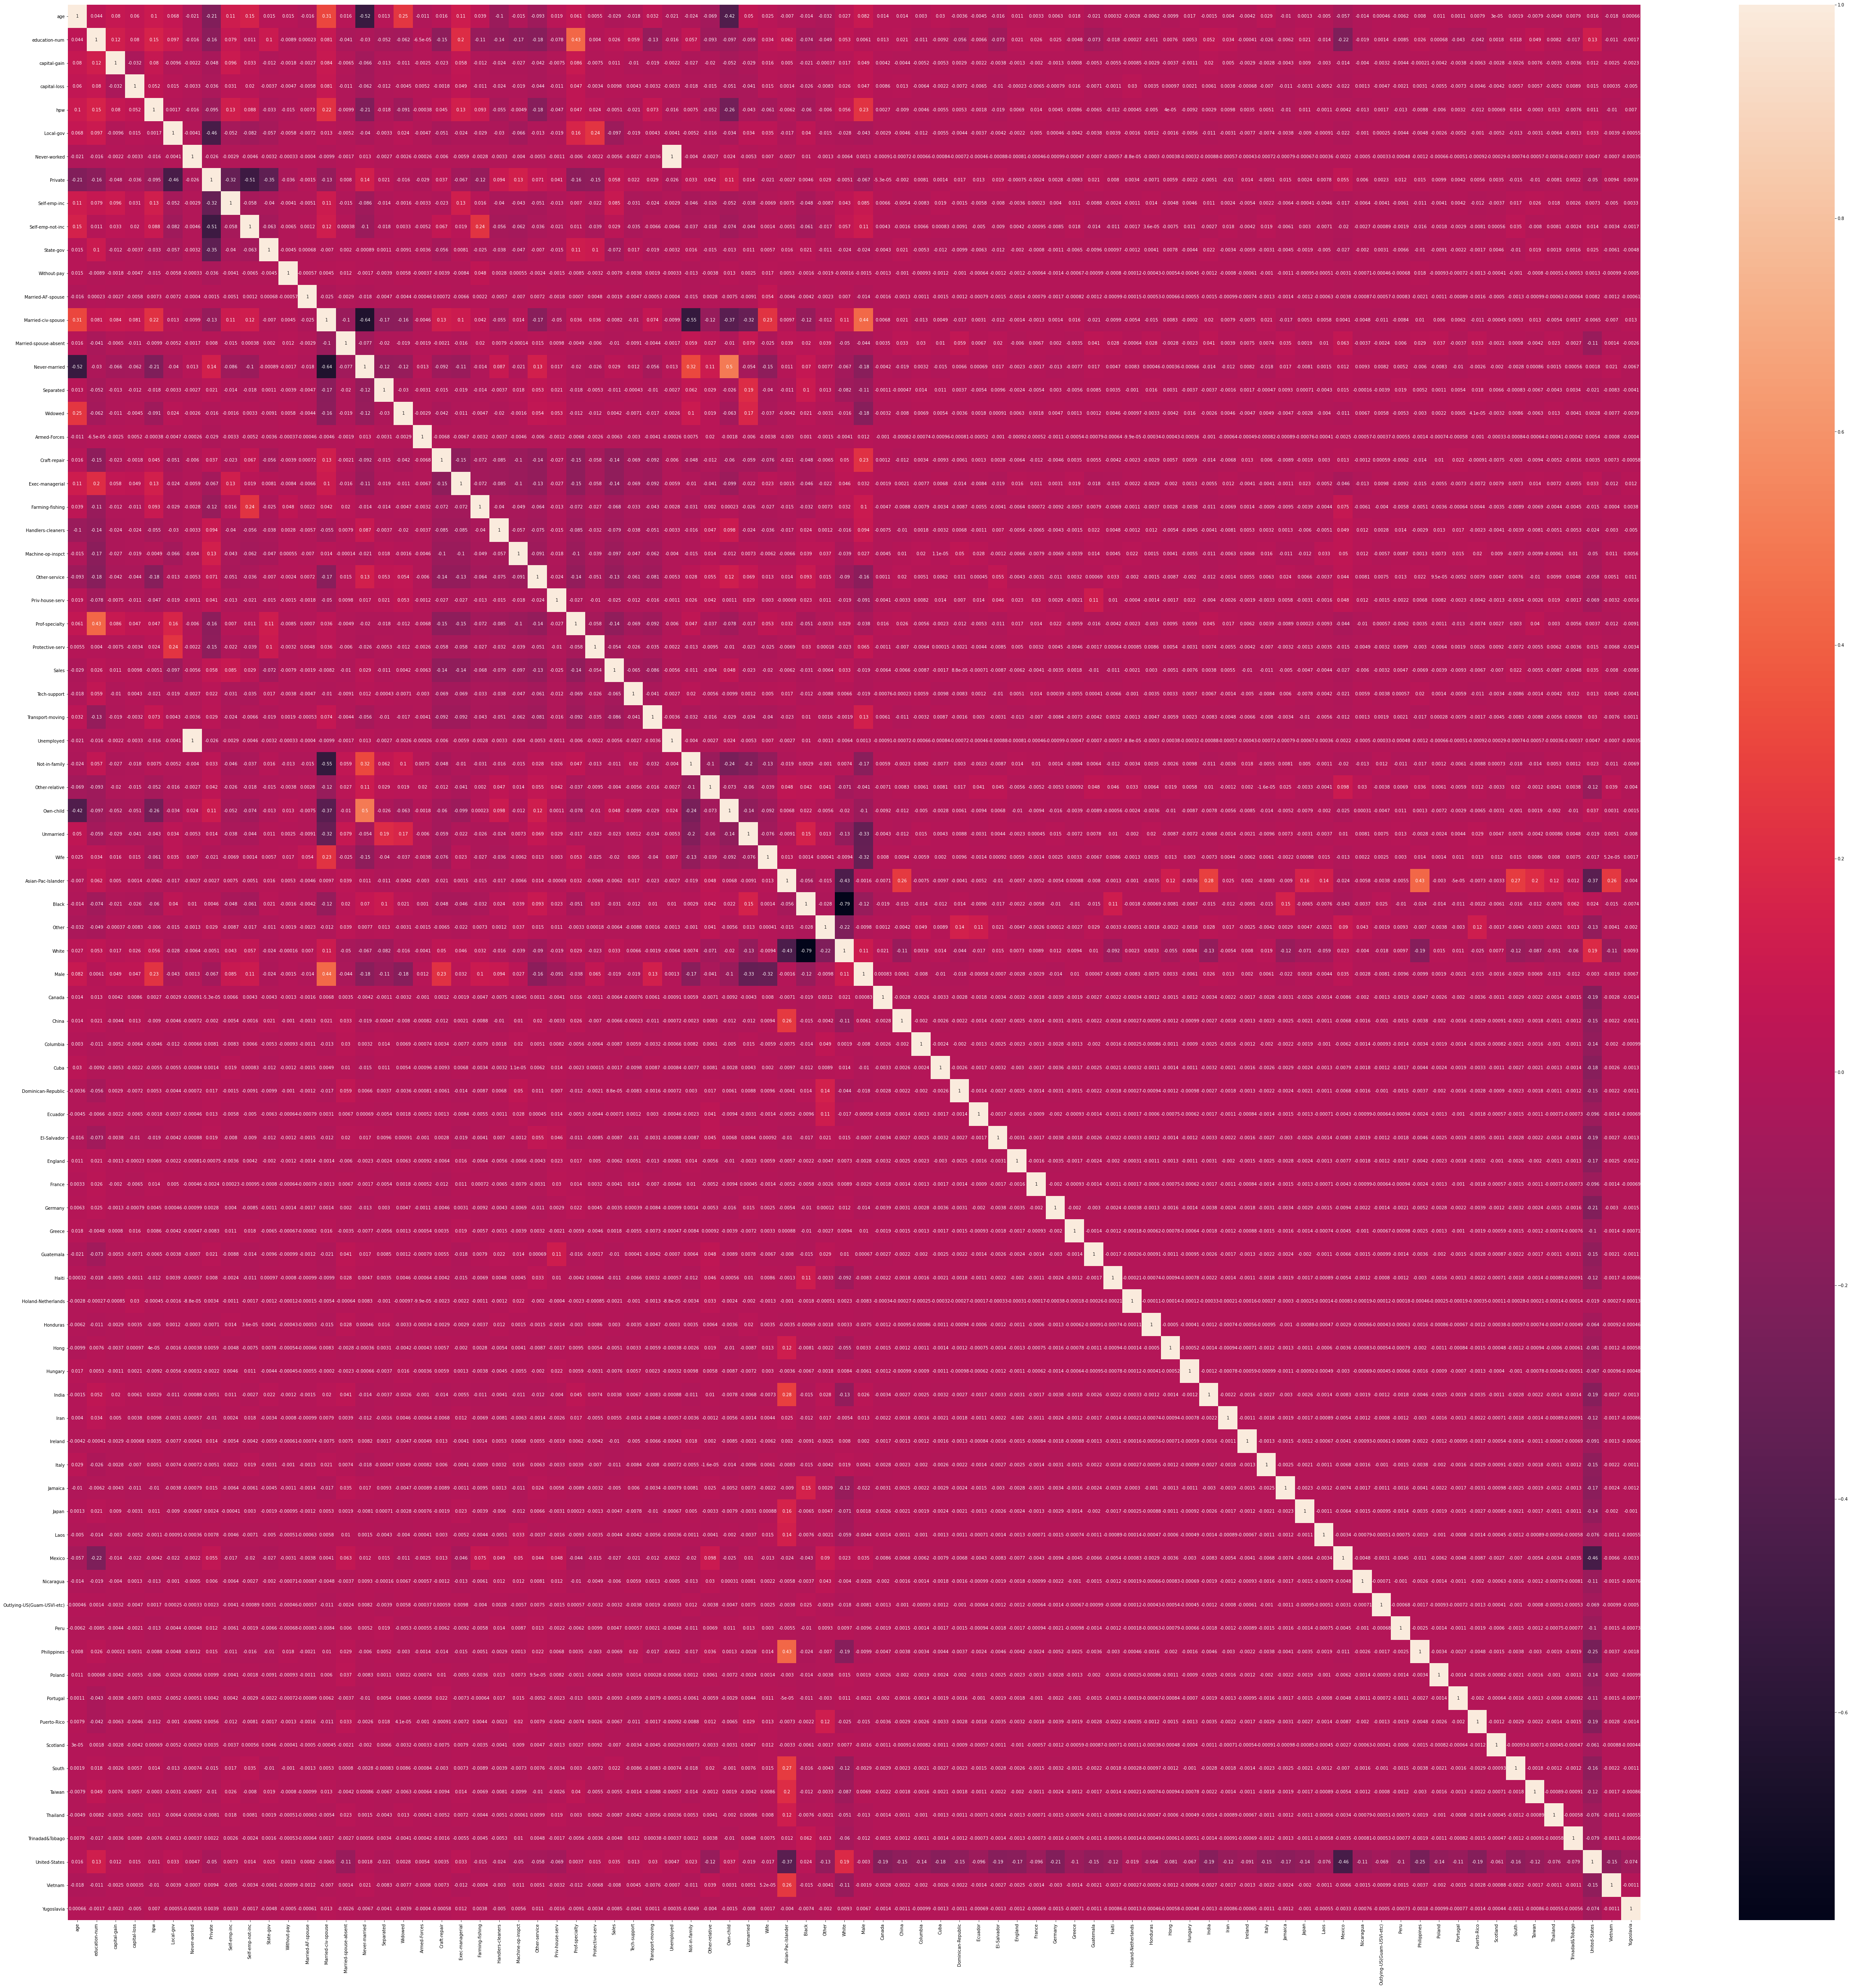

In [53]:
plt.figure(figsize=(82,82))
sns.heatmap(X_train.corr(),annot=True)

In [54]:
logReg = LogisticRegression(max_iter=1000)
rfe = RFE(logReg,n_features_to_select=20).fit(X_train,y_train)
#logReg.fit(X_train,y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('education-num', True, 1),
 ('capital-gain', True, 1),
 ('capital-loss', True, 1),
 ('hpw', True, 1),
 ('Local-gov', False, 29),
 ('Never-worked', False, 35),
 ('Private', False, 31),
 ('Self-emp-inc', False, 36),
 ('Self-emp-not-inc', False, 6),
 ('State-gov', False, 27),
 ('Without-pay', True, 1),
 ('Married-AF-spouse', True, 1),
 ('Married-civ-spouse', True, 1),
 ('Married-spouse-absent', False, 62),
 ('Never-married', False, 19),
 ('Separated', False, 50),
 ('Widowed', False, 43),
 ('Armed-Forces', False, 30),
 ('Craft-repair', False, 56),
 ('Exec-managerial', False, 4),
 ('Farming-fishing', True, 1),
 ('Handlers-cleaners', True, 1),
 ('Machine-op-inspct', False, 23),
 ('Other-service', True, 1),
 ('Priv-house-serv', True, 1),
 ('Prof-specialty', False, 18),
 ('Protective-serv', False, 26),
 ('Sales', False, 34),
 ('Tech-support', False, 7),
 ('Transport-moving', False, 46),
 ('Unemployed', False, 33),
 ('Not-in-family', False, 42),
 ('Other-relative', False, 2

In [56]:
top_cols = X_train.columns[rfe.support_]

In [57]:
X_train_lm = sm.add_constant(X_train[top_cols])
glm = sm.GLM(y_train,X_train_lm,family=sm.families.Binomial()).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   GT50   No. Observations:                30169
Model:                            GLM   Df Residuals:                    30148
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10026.
Date:                Mon, 09 Nov 2020   Deviance:                       20053.
Time:                        21:18:22   Pearson chi2:                 5.18e+05
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -8.3657      0.138    -60.504      0.000      -8.637      -8.095
age                            2.1840      0.115     19.038      0.000       1.959       2.409
education-num                  5.0603      0.121     41.719      0.000       4.823       5.298
capital-gain                  31.4999      1.037     30.386      0.000      29.468      33.532
capital-loss                   2.8113      0.165     17.072      0.000       2.489       3.134
hpw                            3.1190      0.161     19.353      0.000       2.803       3.435
Without-pay                  -21.8534    1.7e+04     -0.001      0.999   -3.33e+04    3.32e+04
Married-AF-spouse              2.6581      0.516      5.148      0.000       1.646       3.670
Married-civ-spouse             1.8875      0.054     34.947      0.000       1.782       1.993
Farming-fishing               -1.5575      0.122    -12.718      0.000      -1.798      -1.318
Handlers-cleaners             -0.9020      0.130     -6.939      0.000      -1.157      -0.647
Other-service                 -1.1471      0.103    -11.108      0.000      -1.350      -0.945
Priv-house-serv               -4.5549      1.546     -2.947      0.003      -7.585      -1.525
Own-child                     -1.2089      0.144     -8.367      0.000      -1.492      -0.926
Wife                           1.2849      0.101     12.765      0.000       1.088       1.482
Male                           0.7886      0.075     10.524      0.000       0.642       0.935
Columbia                      -2.3285      0.798     -2.919      0.004      -3.892      -0.765
Dominican-Republic            -1.9811      1.036     -1.913      0.056      -4.011       0.049
Outlying-US(Guam-USVI-etc)   -21.2610   1.96e+04     -0.001      0.999   -3.84e+04    3.83e+04
South                         -1.3087      0.409     -3.197      0.001      -2.111      -0.506
Vietnam                       -1.3749      0.599     -2.294      0.022      -2.550      -0.200
==============================================================================================
"""

In [58]:
X_train_lm1 = X_train_lm.drop('Without-pay',axis=1)
glm = sm.GLM(y_train,X_train_lm1,family=sm.families.Binomial()).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   GT50   No. Observations:                30169
Model:                            GLM   Df Residuals:                    30149
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10030.
Date:                Mon, 09 Nov 2020   Deviance:                       20059.
Time:                        21:18:23   Pearson chi2:                 5.15e+05
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -8.3670      0.138    -60.520      0.000      -8.638      -8.096
age                            2.1769      0.115     18.986      0.000       1.952       2.402
education-num                  5.0615      0.121     41.727      0.000       4.824       5.299
capital-gain                  31.5016      1.036     30.394      0.000      29.470      33.533
capital-loss                   2.8131      0.165     17.083      0.000       2.490       3.136
hpw                            3.1258      0.161     19.403      0.000       2.810       3.442
Married-AF-spouse              2.6595      0.516      5.150      0.000       1.647       3.672
Married-civ-spouse             1.8875      0.054     34.945      0.000       1.782       1.993
Farming-fishing               -1.5631      0.122    -12.768      0.000      -1.803      -1.323
Handlers-cleaners             -0.9016      0.130     -6.937      0.000      -1.156      -0.647
Other-service                 -1.1488      0.103    -11.126      0.000      -1.351      -0.946
Priv-house-serv               -4.5546      1.546     -2.946      0.003      -7.585      -1.524
Own-child                     -1.2110      0.144     -8.383      0.000      -1.494      -0.928
Wife                           1.2809      0.101     12.732      0.000       1.084       1.478
Male                           0.7881      0.075     10.518      0.000       0.641       0.935
Columbia                      -2.3278      0.798     -2.918      0.004      -3.891      -0.764
Dominican-Republic            -1.9804      1.036     -1.912      0.056      -4.010       0.050
Outlying-US(Guam-USVI-etc)   -20.2599   1.19e+04     -0.002      0.999   -2.33e+04    2.32e+04
South                         -1.3076      0.409     -3.195      0.001      -2.110      -0.505
Vietnam                       -1.3739      0.599     -2.292      0.022      -2.549      -0.199
==============================================================================================
"""

In [59]:
X_train_lm2 = X_train_lm1.drop('Outlying-US(Guam-USVI-etc)',axis=1)
glm = sm.GLM(y_train,X_train_lm2,family=sm.families.Binomial()).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   GT50   No. Observations:                30169
Model:                            GLM   Df Residuals:                    30150
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10031.
Date:                Mon, 09 Nov 2020   Deviance:                       20062.
Time:                        21:18:23   Pearson chi2:                 5.17e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.3693      0.138    -60.533      0.000      -8.640      -8.098
age                    2.1770      0.115     18.989      0.000       1.952       2.402
education-num          5.0623      0.121     41.733      0.000       4.825       5.300
capital-gain          31.5112      1.037     30.400      0.000      29.480      33.543
capital-loss           2.8144      0.165     17.089      0.000       2.492       3.137
hpw                    3.1261      0.161     19.405      0.000       2.810       3.442
Married-AF-spouse      2.6612      0.516      5.153      0.000       1.649       3.673
Married-civ-spouse     1.8884      0.054     34.965      0.000       1.783       1.994
Farming-fishing       -1.5629      0.122    -12.766      0.000      -1.803      -1.323
Handlers-cleaners     -0.9016      0.130     -6.937      0.000      -1.156      -0.647
Other-service         -1.1488      0.103    -11.127      0.000      -1.351      -0.946
Priv-house-serv       -4.5547      1.546     -2.945      0.003      -7.585      -1.524
Own-child             -1.2100      0.144     -8.375      0.000      -1.493      -0.927
Wife                   1.2805      0.101     12.729      0.000       1.083       1.478
Male                   0.7887      0.075     10.526      0.000       0.642       0.936
Columbia              -2.3276      0.798     -2.918      0.004      -3.891      -0.764
Dominican-Republic    -1.9796      1.036     -1.911      0.056      -4.010       0.051
South                 -1.3074      0.409     -3.194      0.001      -2.110      -0.505
Vietnam               -1.3738      0.599     -2.292      0.022      -2.549      -0.199
======================================================================================
"""

In [60]:
X_train_lm3 = X_train_lm2.drop('Dominican-Republic',axis=1)
glm = sm.GLM(y_train,X_train_lm3,family=sm.families.Binomial()).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   GT50   No. Observations:                30169
Model:                            GLM   Df Residuals:                    30151
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10034.
Date:                Mon, 09 Nov 2020   Deviance:                       20069.
Time:                        21:18:23   Pearson chi2:                 5.23e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.3743      0.138    -60.576      0.000      -8.645      -8.103
age                    2.1795      0.115     19.010      0.000       1.955       2.404
education-num          5.0698      0.121     41.825      0.000       4.832       5.307
capital-gain          31.5343      1.037     30.415      0.000      29.502      33.566
capital-loss           2.8177      0.165     17.107      0.000       2.495       3.140
hpw                    3.1196      0.161     19.383      0.000       2.804       3.435
Married-AF-spouse      2.6665      0.516      5.164      0.000       1.654       3.679
Married-civ-spouse     1.8897      0.054     34.992      0.000       1.784       1.996
Farming-fishing       -1.5611      0.122    -12.751      0.000      -1.801      -1.321
Handlers-cleaners     -0.9012      0.130     -6.934      0.000      -1.156      -0.646
Other-service         -1.1481      0.103    -11.122      0.000      -1.350      -0.946
Priv-house-serv       -4.5613      1.545     -2.952      0.003      -7.590      -1.533
Own-child             -1.2093      0.144     -8.371      0.000      -1.493      -0.926
Wife                   1.2758      0.101     12.690      0.000       1.079       1.473
Male                   0.7884      0.075     10.522      0.000       0.642       0.935
Columbia              -2.3271      0.798     -2.917      0.004      -3.891      -0.763
South                 -1.3062      0.409     -3.191      0.001      -2.108      -0.504
Vietnam               -1.3731      0.600     -2.290      0.022      -2.548      -0.198
======================================================================================
"""

In [64]:
import vif_helper

In [65]:
vif_helper.get_vif(X_train_lm3.drop('const',axis=1))

Features    VIF
4                  hpw  10.12
1        education-num   9.59
13                Male   5.09
0                  age   4.06
6   Married-civ-spouse   3.45
12                Wife   1.44
11           Own-child   1.43
9        Other-service   1.14
8    Handlers-cleaners   1.09
7      Farming-fishing   1.08
3         capital-loss   1.06
2         capital-gain   1.04
10     Priv-house-serv   1.01
5    Married-AF-spouse   1.01
14            Columbia   1.00
15               South   1.00
16             Vietnam   1.00

<AxesSubplot:>

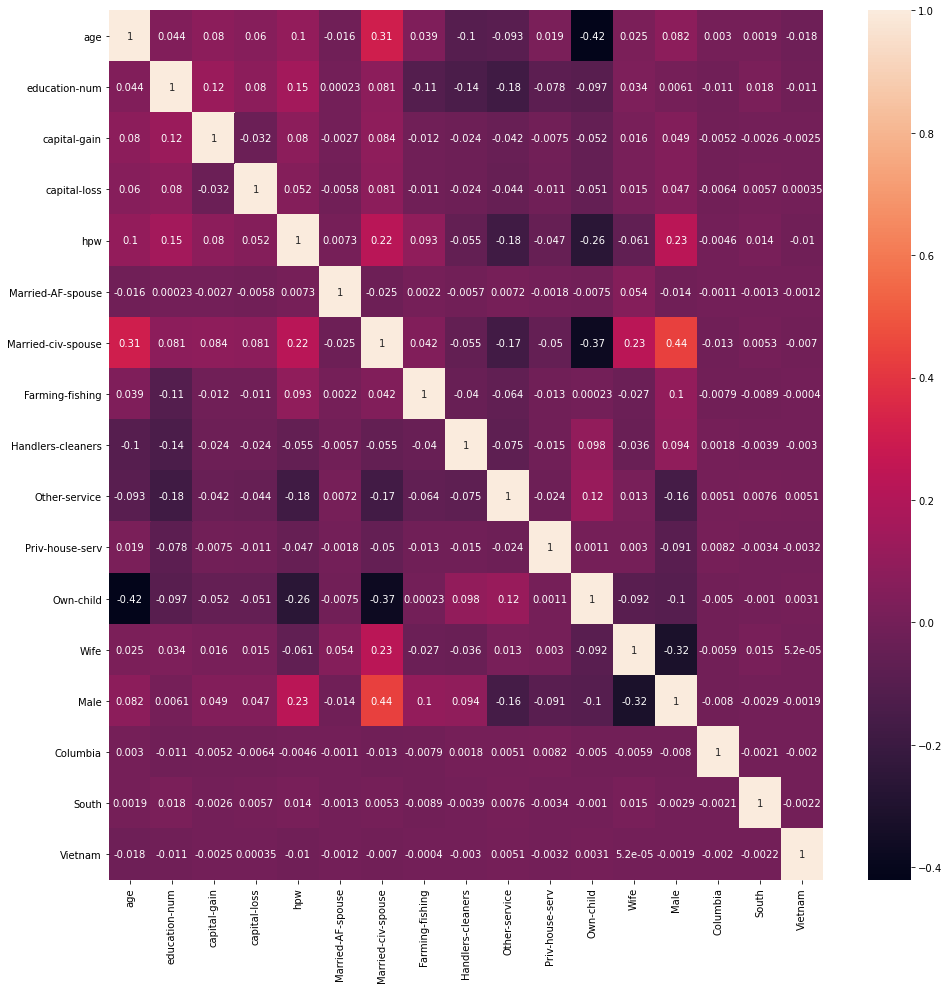

In [66]:
plt.figure(figsize=(16,16))
sns.heatmap(X_train_lm3.drop('const',axis=1).corr(),annot=True)

In [67]:
X_train_lm4 = X_train_lm3.drop('hpw',axis=1)
glm = sm.GLM(y_train,X_train_lm4,family=sm.families.Binomial()).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   GT50   No. Observations:                30169
Model:                            GLM   Df Residuals:                    30152
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10228.
Date:                Mon, 09 Nov 2020   Deviance:                       20456.
Time:                        21:20:06   Pearson chi2:                 5.71e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -7.0603      0.115    -61.312      0.000      -7.286      -6.835
age                    1.8756      0.111     16.859      0.000       1.658       2.094
education-num          5.1803      0.120     43.095      0.000       4.945       5.416
capital-gain          31.6178      1.031     30.652      0.000      29.596      33.639
capital-loss           2.8618      0.163     17.532      0.000       2.542       3.182
Married-AF-spouse      2.8033      0.498      5.633      0.000       1.828       3.779
Married-civ-spouse     1.9013      0.053     35.668      0.000       1.797       2.006
Farming-fishing       -1.2626      0.118    -10.667      0.000      -1.495      -1.031
Handlers-cleaners     -0.9978      0.129     -7.715      0.000      -1.251      -0.744
Other-service         -1.2293      0.102    -12.059      0.000      -1.429      -1.030
Priv-house-serv       -4.2786      1.784     -2.398      0.016      -7.776      -0.782
Own-child             -1.3771      0.143     -9.657      0.000      -1.657      -1.098
Wife                   1.1454      0.099     11.558      0.000       0.951       1.340
Male                   0.8804      0.074     11.927      0.000       0.736       1.025
Columbia              -2.2934      0.782     -2.931      0.003      -3.827      -0.760
South                 -1.1508      0.398     -2.892      0.004      -1.931      -0.371
Vietnam               -1.4179      0.579     -2.448      0.014      -2.553      -0.283
======================================================================================
"""

In [68]:
vif_helper.get_vif(X_train_lm4.drop('const',axis=1))

Features   VIF
1        education-num  5.32
12                Male  4.73
0                  age  3.90
5   Married-civ-spouse  3.45
10           Own-child  1.43
11                Wife  1.43
8        Other-service  1.13
7    Handlers-cleaners  1.09
3         capital-loss  1.06
6      Farming-fishing  1.06
2         capital-gain  1.04
4    Married-AF-spouse  1.01
9      Priv-house-serv  1.01
13            Columbia  1.00
14               South  1.00
15             Vietnam  1.00

In [69]:
    X_train_lm5 = X_train_lm4.drop('education-num',axis=1)
glm = sm.GLM(y_train,X_train_lm5,family=sm.families.Binomial()).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   GT50   No. Observations:                30169
Model:                            GLM   Df Residuals:                    30153
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11353.
Date:                Mon, 09 Nov 2020   Deviance:                       22707.
Time:                        21:20:06   Pearson chi2:                 2.30e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.4108      0.068    -50.457      0.000      -3.543      -3.278
age                    1.5621      0.103     15.208      0.000       1.361       1.763
capital-gain          32.2427      0.970     33.229      0.000      30.341      34.144
capital-loss           3.1454      0.151     20.898      0.000       2.850       3.440
Married-AF-spouse      2.4839      0.486      5.114      0.000       1.532       3.436
Married-civ-spouse     1.7317      0.050     34.335      0.000       1.633       1.831
Farming-fishing       -1.6303      0.114    -14.333      0.000      -1.853      -1.407
Handlers-cleaners     -1.5578      0.125    -12.439      0.000      -1.803      -1.312
Other-service         -1.6976      0.099    -17.219      0.000      -1.891      -1.504
Priv-house-serv       -4.4070      1.457     -3.024      0.002      -7.263      -1.551
Own-child             -1.5949      0.141    -11.343      0.000      -1.870      -1.319
Wife                   1.0994      0.095     11.623      0.000       0.914       1.285
Male                   0.7889      0.071     11.098      0.000       0.650       0.928
Columbia              -2.1905      0.755     -2.901      0.004      -3.671      -0.710
South                 -0.6438      0.370     -1.740      0.082      -1.369       0.081
Vietnam               -1.5403      0.553     -2.784      0.005      -2.625      -0.456
======================================================================================
"""

In [70]:
X_train_lm6 = X_train_lm5.drop('South',axis=1)
glm = sm.GLM(y_train,X_train_lm6,family=sm.families.Binomial()).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   GT50   No. Observations:                30169
Model:                            GLM   Df Residuals:                    30154
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11355.
Date:                Mon, 09 Nov 2020   Deviance:                       22710.
Time:                        21:20:08   Pearson chi2:                 2.31e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.4108      0.068    -50.466      0.000      -3.543      -3.278
age                    1.5607      0.103     15.197      0.000       1.359       1.762
capital-gain          32.2521      0.971     33.231      0.000      30.350      34.154
capital-loss           3.1429      0.150     20.886      0.000       2.848       3.438
Married-AF-spouse      2.4859      0.486      5.118      0.000       1.534       3.438
Married-civ-spouse     1.7316      0.050     34.334      0.000       1.633       1.830
Farming-fishing       -1.6288      0.114    -14.320      0.000      -1.852      -1.406
Handlers-cleaners     -1.5566      0.125    -12.430      0.000      -1.802      -1.311
Other-service         -1.6991      0.099    -17.237      0.000      -1.892      -1.506
Priv-house-serv       -4.4066      1.458     -3.022      0.003      -7.264      -1.549
Own-child             -1.5963      0.141    -11.354      0.000      -1.872      -1.321
Wife                   1.0971      0.095     11.602      0.000       0.912       1.282
Male                   0.7882      0.071     11.089      0.000       0.649       0.928
Columbia              -2.1891      0.755     -2.899      0.004      -3.669      -0.709
Vietnam               -1.5389      0.553     -2.781      0.005      -2.623      -0.454
======================================================================================
"""

In [71]:
vif_helper.get_vif(X_train_lm6.drop('const',axis=1))

Features   VIF
11                Male  3.96
4   Married-civ-spouse  3.45
0                  age  2.59
10                Wife  1.36
9            Own-child  1.26
7        Other-service  1.13
6    Handlers-cleaners  1.09
2         capital-loss  1.06
5      Farming-fishing  1.05
1         capital-gain  1.04
3    Married-AF-spouse  1.01
8      Priv-house-serv  1.01
12            Columbia  1.00
13             Vietnam  1.00

In [72]:
y_train_pred = glm.predict(X_train_lm6)
pred_df = pd.concat([y_train,y_train_pred.rename('GT50_prob')],axis=1)
pred_df['GT50_pred'] = pred_df['GT50_prob'].apply(lambda x: 1 if x > 0.5 else 0)

In [73]:
from sklearn import metrics

In [74]:
metrics.accuracy_score(pred_df['GT50'],pred_df['GT50_pred'])

0.7948556465245782

In [75]:
confusion = metrics.confusion_matrix(pred_df['GT50'],pred_df['GT50_pred'])
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [76]:
confusion

array([[21370,  1291],
       [ 4898,  2610]], dtype=int64)

In [77]:
#sensitivity
TP/(TP+FN)

0.34762919552477356

In [78]:
#specificity
TN/(FP+TN)

0.9430298751158378

With setting 0.5 as cut-off probability for classification, we observed very low sensitivity/recall.

In [79]:
def draw_roc(actual, pred):
    fpr, tpr, threshold = metrics.roc_curve(actual, pred, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, pred)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area=%0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    print(fpr)
    plt.show()

[0.         0.05697012 1.        ]


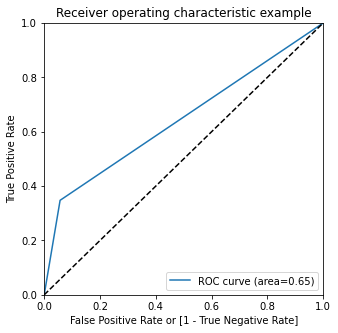

In [80]:
draw_roc(pred_df['GT50'],pred_df['GT50_pred'])

In [81]:
cutoff_df = pd.DataFrame(columns=['accuracy','sensi','speci'])
tot = pred_df.shape[0]
prob_tests = np.arange(0.0,1.01,0.01)
#acc_score = metrics.accuracy_score(pred_df.GT50, pred_df.GT50_pred)
for p in prob_tests:
    churn_pred = pred_df['GT50_prob'].apply(lambda x: 1 if x > p else 0)
    cm = metrics.confusion_matrix(pred_df.GT50, churn_pred)
    #acc_score = metrics.accuracy_score(pred_df.GT50, pred_df.GT50_pred)
    accuracy = (cm[0,0]+cm[1,1])/tot
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff_df.loc[p] = [accuracy,sensi,speci]

<AxesSubplot:>

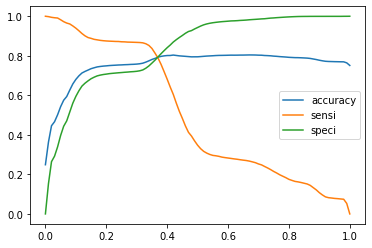

In [82]:
cutoff_df.plot()

In [83]:
print((abs(cutoff_df.accuracy - cutoff_df.speci)).idxmin())
print((abs(cutoff_df.accuracy - cutoff_df.sensi)).idxmin())
print((abs(cutoff_df.sensi - cutoff_df.speci)).idxmin())

0.37
0.37
0.37


In [84]:
#count of 0s in y_train
y_train.shape[0] - y_train.sum()

22661.0

In [85]:
pred_df['GT50_pred'] = pred_df['GT50_prob'].apply(lambda x: 1 if x > 0.37 else 0)

In [86]:
metrics.accuracy_score(pred_df['GT50'],pred_df['GT50_pred'])

0.7928668500778945

In [87]:
confusion = metrics.confusion_matrix(pred_df['GT50'],pred_df['GT50_pred'])
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
print('sensitivity')
print(TP/(TP+FN))
print('specificity')
print(TN/(FP+TN))
print('accuracy')
print(metrics.accuracy_score(pred_df['GT50'],pred_df['GT50_pred']))
print(confusion)

sensitivity
0.788359083644113
specificity
0.794360354794581
accuracy
0.7928668500778945
[[18001  4660]
 [ 1589  5919]]


In [88]:
X_test_lm = X_test[top_cols].drop(['South','education-num','hpw','Dominican-Republic','Outlying-US(Guam-USVI-etc)','Without-pay'],axis=1)
y_test_pred = glm.predict(sm.add_constant(X_test_lm))
test_pred_df = pd.concat([y_test,y_test_pred.rename('GT50_prob')],axis=1)
test_pred_df['GT50_pred'] = test_pred_df['GT50_prob'].apply(lambda x: 1 if x > 0.37 else 0)
confusion = metrics.confusion_matrix(test_pred_df['GT50'],test_pred_df['GT50_pred'])
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
print('sensitivity')
print(TP/(TP+FN))
print('specificity')
print(TN/(FP+TN))
print('accuracy')
print(metrics.accuracy_score(test_pred_df['GT50'],test_pred_df['GT50_pred']))
print(confusion)

sensitivity
0.782972972972973
specificity
0.7885241573528118
accuracy
0.7871605921795127
[[8960 2403]
 [ 803 2897]]


[0.         0.         0.         ... 0.99982399 0.999912   1.        ]


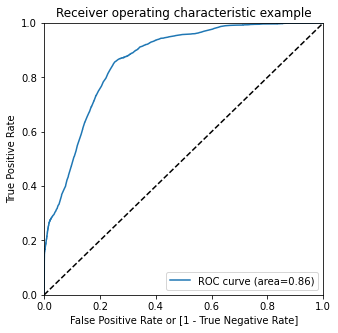

In [89]:
draw_roc(y_test,y_test_pred)

In [90]:
cutoff_df = pd.DataFrame(columns=['accuracy','sensi','speci'])
tot = test_pred_df.shape[0]
prob_tests = np.arange(0.0,1.01,0.01)
#acc_score = metrics.accuracy_score(pred_df.GT50, pred_df.GT50_pred)
for p in prob_tests:
    churn_pred = test_pred_df['GT50_prob'].apply(lambda x: 1 if x > p else 0)
    cm = metrics.confusion_matrix(test_pred_df.GT50, churn_pred)
    #acc_score = metrics.accuracy_score(pred_df.GT50, pred_df.GT50_pred)
    accuracy = (cm[0,0]+cm[1,1])/tot
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff_df.loc[p] = [accuracy,sensi,speci]

<AxesSubplot:>

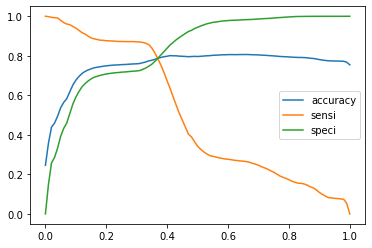

In [91]:
cutoff_df.plot()

#### Logistic regression model was trained and gave decent performance using cutoff probability of 0.37 for positive class.

In [92]:
def plotGridCV(grid_cv):
    cv_results = pd.DataFrame(grid_cv.cv_results_)
    for param in grid_cv.best_params_.keys():
        result_subset = cv_results
        title_arr = []
        for param_p in grid_cv.best_params_.keys():
            if param_p == param: continue
            result_subset = result_subset[result_subset["param_"+param_p] == grid_cv.best_params_[param_p]]
            title_arr.append("{0}: {1}".format(param_p,grid_cv.best_params_[param_p]))
        plt.plot(result_subset["param_"+param],result_subset['mean_test_score'])
        plt.plot(result_subset["param_"+param],result_subset['mean_train_score'])
        plt.xlabel(param)
        plt.title(", ".join(title_arr))
        plt.show()

In [93]:
def generateReport(estimator, X, y):
    y_pred = estimator.predict(X)
    print('Accuracy',metrics.accuracy_score(y, y_pred))
    confusion = metrics.confusion_matrix(y, y_pred)
    TP=confusion[1,1]
    TN=confusion[0,0]
    FP=confusion[0,1]
    FN=confusion[1,0]
    print('sensitivity',TP/(TP+FN))
    print('specificity',TN/(FP+TN))
    print(metrics.classification_report(y, y_pred))
    print('Balanced accuracy', metrics.balanced_accuracy_score(y, y_pred))
    print("AUC Score", metrics.roc_auc_score(y, y_pred))

#### Trying Decision trees to get an improved model

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [95]:
import pickle

In [96]:
dt_model_init = DecisionTreeClassifier(max_depth=30,random_state=1243,class_weight='balanced')
dt_model_init.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=30, random_state=1243)

In [97]:
dt_model_init.score(X_train, y_train)

0.9373860585369087

In [98]:
dt_model_init.score(X_test, y_test)

0.8072097191794463

Initial decision tree model gave good performance than logistic regression. Wil try hyperparameter tuning

In [100]:
dt_model=DecisionTreeClassifier(random_state=1243,class_weight='balanced',min_samples_leaf=10)
params = {
    "max_depth":range(5,55,5),
    "min_samples_split":range(30,51,4),
    "min_samples_leaf":range(5,31,5)
}
dt_gridCV = GridSearchCV(dt_model,
                         param_grid=params,
                         verbose=1,
                         return_train_score=True,
                         n_jobs=-1,scoring='balanced_accuracy')
dt_gridCV.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  1.7min finished


GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              min_samples_leaf=10,
                                              random_state=1243),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 55, 5),
                         'min_samples_leaf': range(5, 31, 5),
                         'min_samples_split': range(30, 51, 4)},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [101]:
dt_gridCV.best_score_

0.8208463785952453

In [102]:
dt_gridCV.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 42}

In [103]:
generateReport(dt_gridCV.best_estimator_, X_test, y_test)

Accuracy 0.8074752705304388
sensitivity 0.8518918918918919
specificity 0.7930124086948869
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86     11363
         1.0       0.57      0.85      0.68      3700

    accuracy                           0.81     15063
   macro avg       0.76      0.82      0.77     15063
weighted avg       0.85      0.81      0.82     15063

Balanced accuracy 0.8224521502933894
AUC Score 0.8224521502933893


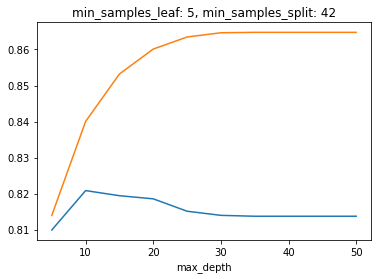

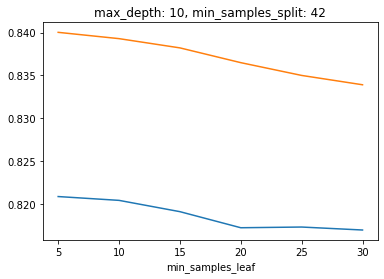

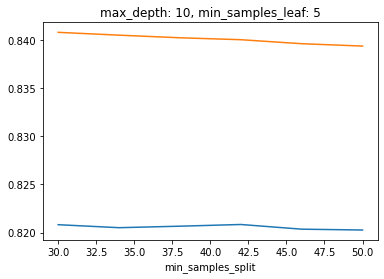

In [104]:
plotGridCV(dt_gridCV)

In [105]:
dt_model_final = DecisionTreeClassifier(random_state=1243,
                                        class_weight='balanced',
                                        max_depth=10,
                                        min_samples_leaf=5,
                                        min_samples_split=42)
dt_model_final.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=42,
                       random_state=1243)

In [106]:
generateReport(dt_model_final,X_test, y_test)

Accuracy 0.8074752705304388
sensitivity 0.8518918918918919
specificity 0.7930124086948869
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86     11363
         1.0       0.57      0.85      0.68      3700

    accuracy                           0.81     15063
   macro avg       0.76      0.82      0.77     15063
weighted avg       0.85      0.81      0.82     15063

Balanced accuracy 0.8224521502933894
AUC Score 0.8224521502933893


In [107]:
with open('census_dt_model.pkl','wb') as f:
    pickle.dump(dt_model_final, f, pickle.HIGHEST_PROTOCOL)

Even after hyperparameter tuning, decision tree performed only slightly better than Logistic Regression

### Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [164]:
rf_model_init = RandomForestClassifier(max_depth=10,
                                       min_samples_leaf=5,
                                       min_samples_split=42,
                                       verbose=1,
                                       n_jobs=-1,
                                       oob_score=True,
                                       class_weight='balanced')
rf_model_init.fit(X_train, y_train)
print(rf_model_init.score(X_train, y_train))
print(rf_model_init.score(X_test,y_test))
print(rf_model_init.oob_score_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7933309025821207
0.7886211246099715
0.7858397692996122


In [380]:
generateReport(rf_model_init,X_test, y_test)

Accuracy 0.7886211246099715
sensitivity 0.8891891891891892
specificity 0.7558743289624219
              precision    recall  f1-score   support

         0.0       0.95      0.76      0.84     11363
         1.0       0.54      0.89      0.67      3700

    accuracy                           0.79     15063
   macro avg       0.75      0.82      0.76     15063
weighted avg       0.85      0.79      0.80     15063

Balanced accuracy 0.8225317590758056
AUC Score 0.8225317590758056


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [177]:
rf_model = RandomForestClassifier(max_depth=45,n_estimators=150, random_state=1243,oob_score=True,class_weight='balanced')
params={
    "min_samples_split":range(50,76,5),
}
rf_grid_cv = GridSearchCV(rf_model,
                         param_grid=params,
                         verbose=1,
                         return_train_score=True,
                         n_jobs=-1,scoring='balanced_accuracy')
rf_grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.4s finished


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=45, n_estimators=150,
                                              oob_score=True,
                                              random_state=1243),
             n_jobs=-1, param_grid={'min_samples_split': range(50, 76, 5)},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [178]:
rf_grid_cv.best_score_

0.8321952648690047

In [179]:
rf_grid_cv.best_params_

{'min_samples_split': 55}

In [381]:
generateReport(rf_grid_cv.best_estimator_,X_test, y_test)

Accuracy 0.8304454623912899
sensitivity 0.8210810810810811
specificity 0.8334946757018393
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88     11363
         1.0       0.62      0.82      0.70      3700

    accuracy                           0.83     15063
   macro avg       0.78      0.83      0.79     15063
weighted avg       0.86      0.83      0.84     15063

Balanced accuracy 0.8272878783914602
AUC Score 0.8272878783914602


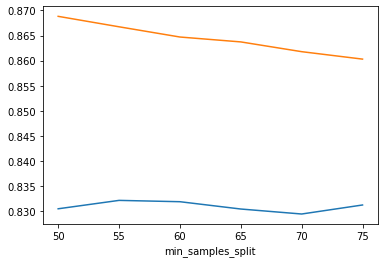

In [181]:
plotGridCV(rf_grid_cv)

In [382]:
print('OOB Score',rf_grid_cv.best_estimator_.oob_score_)

generateReport(rf_grid_cv.best_estimator_,X_test, y_test)

OOB Score 0.8339686433093573
Accuracy 0.8304454623912899
sensitivity 0.8210810810810811
specificity 0.8334946757018393
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88     11363
         1.0       0.62      0.82      0.70      3700

    accuracy                           0.83     15063
   macro avg       0.78      0.83      0.79     15063
weighted avg       0.86      0.83      0.84     15063

Balanced accuracy 0.8272878783914602
AUC Score 0.8272878783914602


In [186]:
rf_grid_cv.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=45,
                       min_samples_split=55, n_estimators=150, oob_score=True,
                       random_state=1243)

In [188]:
rf_final_model = RandomForestClassifier(max_depth=45,n_estimators=150,min_samples_split=55,random_state=1243,oob_score=True,n_jobs=-1, verbose=1)
rf_final_model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.9s finished


RandomForestClassifier(max_depth=45, min_samples_split=55, n_estimators=150,
                       n_jobs=-1, oob_score=True, random_state=1243, verbose=1)

In [383]:
print('OOB Score',rf_final_model.oob_score_)

generateReport(rf_final_model,X_test, y_test)

OOB Score 0.8622095528522655
Accuracy 0.8610502555931754
sensitivity 0.6183783783783784
specificity 0.9400686438440553
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     11363
         1.0       0.77      0.62      0.69      3700

    accuracy                           0.86     15063
   macro avg       0.83      0.78      0.80     15063
weighted avg       0.86      0.86      0.86     15063

Balanced accuracy 0.7792235111112169
AUC Score 0.7792235111112168


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


In [190]:
with open('census_rf_model.pkl','wb') as f:
    pickle.dump(rf_grid_cv.best_estimator_, f, pickle.HIGHEST_PROTOCOL)

Even after hyperparameter tuning, no much improvement from initial model to final model.

### AdaBoost Classifier

In [191]:
ab_model_init = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))
ab_model_init.fit(X_train, y_train)
print(ab_model_init.score(X_train, y_train))
print(ab_model_init.score(X_test,y_test))

0.8914780072259604
0.8574653123547766


In [384]:
generateReport(ab_model_init,X_test,y_test)

Accuracy 0.8574653123547766
sensitivity 0.6564864864864864
specificity 0.9229076828302385
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91     11363
         1.0       0.73      0.66      0.69      3700

    accuracy                           0.86     15063
   macro avg       0.81      0.79      0.80     15063
weighted avg       0.85      0.86      0.85     15063

Balanced accuracy 0.7896970846583624
AUC Score 0.7896970846583624


Initial model gave very poor sensitivity

In [214]:
ab_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,min_samples_split=45,min_samples_leaf=25,class_weight='balanced'),random_state=1243)
params={
    "n_estimators":range(50,101,10)
}
ab_grid_cv = GridSearchCV(ab_model,
                         param_grid=params,
                         verbose=1,
                         return_train_score=True,
                         n_jobs=-1,scoring='balanced_accuracy')
ab_grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   37.7s finished


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_depth=3,
                                                                                min_samples_leaf=25,
                                                                                min_samples_split=45),
                                          random_state=1243),
             n_jobs=-1, param_grid={'n_estimators': range(50, 101, 10)},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [385]:
print(ab_grid_cv.best_score_)

generateReport(ab_grid_cv.best_estimator_,X_test, y_test)

0.8372237604710744
Accuracy 0.82407222996747
sensitivity 0.857027027027027
specificity 0.8133415471266391
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87     11363
         1.0       0.60      0.86      0.71      3700

    accuracy                           0.82     15063
   macro avg       0.77      0.84      0.79     15063
weighted avg       0.86      0.82      0.83     15063

Balanced accuracy 0.8351842870768331
AUC Score 0.835184287076833


In [216]:
ab_grid_cv.best_params_

{'n_estimators': 50}

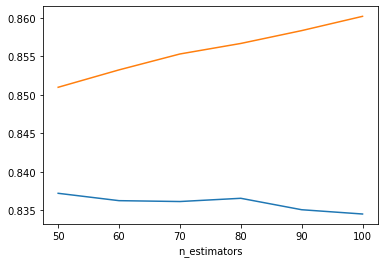

In [217]:
plotGridCV(ab_grid_cv)

In [218]:
ab_model_final = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,min_samples_split=45,min_samples_leaf=25,class_weight='balanced'),n_estimators=50)
ab_model_final.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3,
                                                         min_samples_leaf=25,
                                                         min_samples_split=45))

In [386]:
generateReport(ab_model_final,X_test,y_test)

Accuracy 0.82407222996747
sensitivity 0.857027027027027
specificity 0.8133415471266391
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87     11363
         1.0       0.60      0.86      0.71      3700

    accuracy                           0.82     15063
   macro avg       0.77      0.84      0.79     15063
weighted avg       0.86      0.82      0.83     15063

Balanced accuracy 0.8351842870768331
AUC Score 0.835184287076833


In [220]:
with open('census_ab_model.pkl','wb') as f:
    pickle.dump(ab_model_final, f, pickle.HIGHEST_PROTOCOL)

#### AdaBoost was able to give slightly better performance than RandomForest

### Trying out basic neural network model

In [232]:
from tensorflow import keras
from tensorflow.keras import layers

In [233]:
X_train.shape

(30169, 82)

In [255]:
#modifying y for softmax
y_train_sm = np.array([y_train.values,1 - y_train]).T
y_test_sm = np.array([y_test.values,1 - y_test]).T

In [359]:
input_layer = keras.Input((X_train.shape[1],))
fc_layer1 = layers.Dense(128,activation='relu')(input_layer)
fc_layer2 = layers.Dense(64,activation='relu')(fc_layer1)
fc_layer3 = layers.Dense(32,activation='relu')(fc_layer2)
output_layer = layers.Dense(1,activation='sigmoid')(fc_layer3)
model = keras.Model(input_layer,output_layer,name='census_income_model')

model.summary()

model.compile(optimizer='sgd',loss=keras.losses.BinaryCrossentropy(),metrics=[
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
])

Model: "census_income_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 82)]              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               10624     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 20,993
Trainable params: 20,993
Non-trainable params: 0
_________________________________________________________________


In [360]:
model.fit(X_train, y_train,batch_size=32,epochs=50,validation_split=0.2)

Epoch 1/50
755/755 [==============================] - 2s 2ms/step - loss: 0.5027 - tp: 339.0000 - fp: 373.0000 - tn: 17786.0000 - fn: 5637.0000 - accuracy: 0.7510 - precision: 0.4761 - recall: 0.0567 - auc: 0.7354 - val_loss: 0.4269 - val_tp: 547.0000 - val_fp: 227.0000 - val_tn: 4275.0000 - val_fn: 985.0000 - val_accuracy: 0.7991 - val_precision: 0.7067 - val_recall: 0.3570 - val_auc: 0.8447
Epoch 2/50
755/755 [==============================] - 1s 2ms/step - loss: 0.4023 - tp: 2711.0000 - fp: 1289.0000 - tn: 16870.0000 - fn: 3265.0000 - accuracy: 0.8113 - precision: 0.6777 - recall: 0.4536 - auc: 0.8525 - val_loss: 0.3890 - val_tp: 733.0000 - val_fp: 322.0000 - val_tn: 4180.0000 - val_fn: 799.0000 - val_accuracy: 0.8142 - val_precision: 0.6948 - val_recall: 0.4785 - val_auc: 0.8658
Epoch 3/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3797 - tp: 3190.0000 - fp: 1482.0000 - tn: 16677.0000 - fn: 2786.0000 - accuracy: 0.8232 - precision: 0.6828 - recall: 0.5338 - au

Epoch 22/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3311 - tp: 3632.0000 - fp: 1409.0000 - tn: 16750.0000 - fn: 2344.0000 - accuracy: 0.8445 - precision: 0.7205 - recall: 0.6078 - auc: 0.9018 - val_loss: 0.3771 - val_tp: 1264.0000 - val_fp: 814.0000 - val_tn: 3688.0000 - val_fn: 268.0000 - val_accuracy: 0.8207 - val_precision: 0.6083 - val_recall: 0.8251 - val_auc: 0.9018
Epoch 23/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3298 - tp: 3634.0000 - fp: 1400.0000 - tn: 16759.0000 - fn: 2342.0000 - accuracy: 0.8450 - precision: 0.7219 - recall: 0.6081 - auc: 0.9024 - val_loss: 0.3492 - val_tp: 1163.0000 - val_fp: 636.0000 - val_tn: 3866.0000 - val_fn: 369.0000 - val_accuracy: 0.8334 - val_precision: 0.6465 - val_recall: 0.7591 - val_auc: 0.9018
Epoch 24/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3288 - tp: 3632.0000 - fp: 1401.0000 - tn: 16758.0000 - fn: 2344.0000 - accuracy: 0.8448 - precision: 0.7216 - recall: 0.60

In [362]:
y_train_prob = pd.Series(model.predict(X_train)[:,0],name='GT50_prob',index = y_train.index)
pred_df = pd.concat([y_train,y_train_prob],axis=1)
pred_df['GT50_pred'] = pred_df['GT50_prob'].apply(lambda x: 1 if x > 0.5 else 0)


In [363]:
print("accuracy",metrics.accuracy_score(pred_df['GT50'],pred_df['GT50_pred']))
confusion = metrics.confusion_matrix(pred_df['GT50'],pred_df['GT50_pred'])
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
print('sensitivity',TP/(TP+FN))
print('specificity',TN/(FP+TN))
print(metrics.classification_report(pred_df['GT50'],pred_df['GT50_pred']))
print('Balanced accuracy', metrics.balanced_accuracy_score(pred_df['GT50'],pred_df['GT50_pred']))
print("AUC Score", metrics.roc_auc_score(pred_df['GT50'],pred_df['GT50_pred']))

accuracy 0.8411283105174185
sensitivity 0.7866275972296217
specificity 0.8591853845814394
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89     22661
         1.0       0.65      0.79      0.71      7508

    accuracy                           0.84     30169
   macro avg       0.79      0.82      0.80     30169
weighted avg       0.86      0.84      0.85     30169

Balanced accuracy 0.8229064909055306
AUC Score 0.8229064909055305


[0.         0.14081462 1.        ]


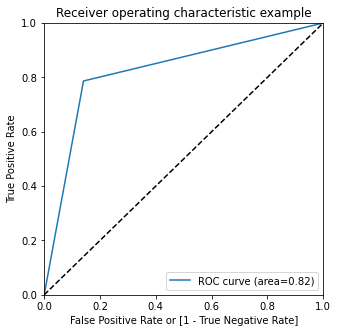

In [364]:
draw_roc(pred_df['GT50'],pred_df['GT50_pred'])

<AxesSubplot:>

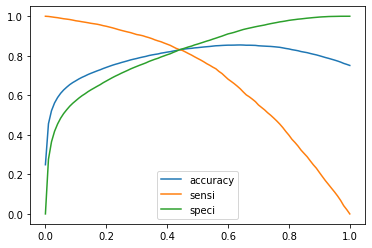

In [365]:
cutoff_df = pd.DataFrame(columns=['accuracy','sensi','speci'])
tot = pred_df.shape[0]
prob_tests = np.arange(0.0,1.01,0.01)
#acc_score = metrics.accuracy_score(pred_df.GT50, pred_df.GT50_pred)
for p in prob_tests:
    churn_pred = pred_df['GT50_prob'].apply(lambda x: 1 if x > p else 0)
    cm = metrics.confusion_matrix(pred_df.GT50, churn_pred)
    #acc_score = metrics.accuracy_score(pred_df.GT50, pred_df.GT50_pred)
    accuracy = (cm[0,0]+cm[1,1])/tot
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff_df.loc[p] = [accuracy,sensi,speci]
cutoff_df.plot()

In [366]:
print((abs(cutoff_df.accuracy - cutoff_df.speci)).idxmin())
print((abs(cutoff_df.accuracy - cutoff_df.sensi)).idxmin())
print((abs(cutoff_df.sensi - cutoff_df.speci)).idxmin())

0.44
0.44
0.44


In [367]:
pred_df['GT50_pred'] = pred_df['GT50_prob'].apply(lambda x: 1 if x > 0.44 else 0)

In [368]:
print("accuracy",metrics.accuracy_score(pred_df['GT50'],pred_df['GT50_pred']))
confusion = metrics.confusion_matrix(pred_df['GT50'],pred_df['GT50_pred'])
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
print('sensitivity',TP/(TP+FN))
print('specificity',TN/(FP+TN))
print(metrics.classification_report(pred_df['GT50'],pred_df['GT50_pred']))
print('Balanced accuracy', metrics.balanced_accuracy_score(pred_df['GT50'],pred_df['GT50_pred']))
print("AUC Score", metrics.roc_auc_score(pred_df['GT50'],pred_df['GT50_pred']))

accuracy 0.8304551029202161
sensitivity 0.8313798614810869
specificity 0.8301487136490004
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88     22661
         1.0       0.62      0.83      0.71      7508

    accuracy                           0.83     30169
   macro avg       0.78      0.83      0.79     30169
weighted avg       0.86      0.83      0.84     30169

Balanced accuracy 0.8307642875650436
AUC Score 0.8307642875650437


[0.         0.16985129 1.        ]


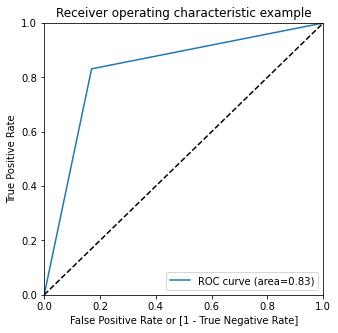

In [369]:
draw_roc(pred_df['GT50'],pred_df['GT50_pred'])

In [372]:
y_test_prob = pd.Series(model.predict(X_test)[:,0],name='GT50_prob',index = y_test.index)
test_pred_df = pd.concat([y_test,y_test_prob],axis=1)
test_pred_df['GT50_pred'] = test_pred_df['GT50_prob'].apply(lambda x: 1 if x > 0.44 else 0)

#### Testing final model

In [387]:
print("accuracy",metrics.accuracy_score(test_pred_df['GT50'],test_pred_df['GT50_pred']))
confusion = metrics.confusion_matrix(test_pred_df['GT50'],test_pred_df['GT50_pred'])
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
print('sensitivity',TP/(TP+FN))
print('specificity',TN/(FP+TN))
print(metrics.classification_report(test_pred_df['GT50'],test_pred_df['GT50_pred']))
print('Balanced accuracy', metrics.balanced_accuracy_score(test_pred_df['GT50'],test_pred_df['GT50_pred']))
print("AUC Score", metrics.roc_auc_score(test_pred_df['GT50'],test_pred_df['GT50_pred']))

accuracy 0.8202217353780787
sensitivity 0.812972972972973
specificity 0.8225820645956173
              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87     11363
         1.0       0.60      0.81      0.69      3700

    accuracy                           0.82     15063
   macro avg       0.76      0.82      0.78     15063
weighted avg       0.85      0.82      0.83     15063

Balanced accuracy 0.8177775187842952
AUC Score 0.8177775187842952


<AxesSubplot:>

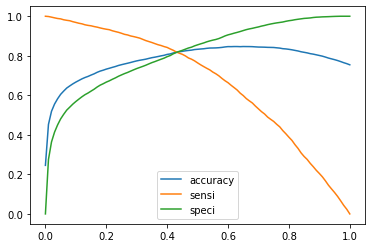

In [374]:
cutoff_df = pd.DataFrame(columns=['accuracy','sensi','speci'])
tot = test_pred_df.shape[0]
prob_tests = np.arange(0.0,1.01,0.01)
#acc_score = metrics.accuracy_score(pred_df.GT50, pred_df.GT50_pred)
for p in prob_tests:
    churn_pred = test_pred_df['GT50_prob'].apply(lambda x: 1 if x > p else 0)
    cm = metrics.confusion_matrix(test_pred_df.GT50, churn_pred)
    #acc_score = metrics.accuracy_score(pred_df.GT50, pred_df.GT50_pred)
    accuracy = (cm[0,0]+cm[1,1])/tot
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff_df.loc[p] = [accuracy,sensi,speci]
cutoff_df.plot()

In [375]:
print((abs(cutoff_df.accuracy - cutoff_df.speci)).idxmin())
print((abs(cutoff_df.accuracy - cutoff_df.sensi)).idxmin())
print((abs(cutoff_df.sensi - cutoff_df.speci)).idxmin())

0.43
0.43
0.43


[0.         0.17741794 1.        ]


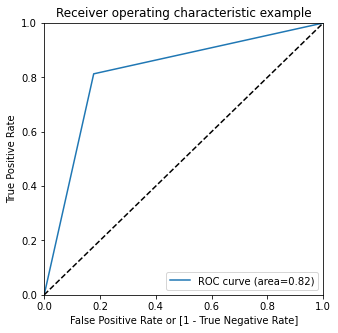

In [376]:
draw_roc(test_pred_df['GT50'],test_pred_df['GT50_pred'])

In [388]:
model.save('census_income_nn.h5')